In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 10)
import numpy as np
from scipy.stats import probplot
from scipy.stats import normaltest
from matplotlib import cm

In [41]:
df = pd.read_pickle('structured_df.pkl')

The question we want to answer: Is there a difference in spiking activity of the Brunel model when drawing the delays from discrete interval [1.0,2.0], where the edge grid points do not have the same probability of getting drawn, and when delays are drawn from [1.0-h/2,2.0+h/2] for resolution h where all points have same probability of getting drawn?

We use the model where delays are drawn from continuous interval [1.0,2.0] as the true values. We will use the data from the dataframe above to decide on this. 

In this notebook we look at the CV, FR and CC distributions directly through plots. No KL divergences, just visualizing the data "raw".

We are also interestend in figuring out whether the distributions are normally distributed, and will therefor plot normplots of each distribution.

We start with looking at the CV values.

# CV
First we plot the ecdf plots of the droop model with higher resolutions, together with the true values.

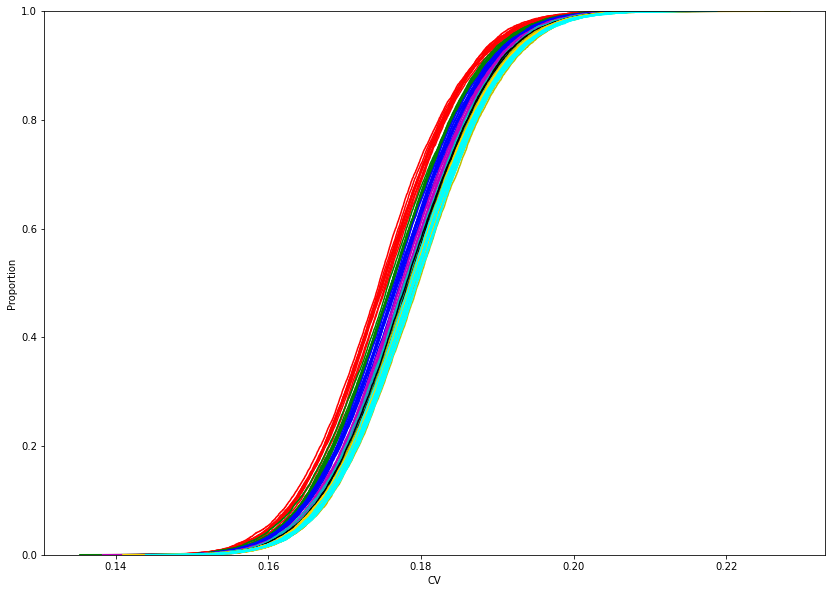

In [4]:
for i in range(1,11):
    cv = df.loc['droop',2,i]['CV']
    sns.ecdfplot(cv,color='r')
    
for i in range(1,11):
    cv = df.loc['droop',4,i]['CV']
    sns.ecdfplot(cv,color='g')
    
for i in range(1,11):
    cv = df.loc['droop',8,i]['CV']
    sns.ecdfplot(cv,color='b')
    
for i in range(1,11):
    cv = df.loc['droop',16,i]['CV']
    sns.ecdfplot(cv,color='m')
    
for i in range(1,11):
    cv = df.loc['droop',32,i]['CV']
    sns.ecdfplot(cv,color='c')
    
for i in range(1,11):
    cv = df.loc['droop',64,i]['CV']
    sns.ecdfplot(cv,color='k')
    
for i in range(1,11):
    cv = df.loc['droop',128,i]['CV']
    sns.ecdfplot(cv,color='y')
    
for i in range(1,11):
    cv = df.loc['droop',256,i]['CV']
    sns.ecdfplot(cv,color='gold')
    
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',8,i]['CV']
    sns.ecdfplot(cv,color='aqua')

We see that as the resolution increases, the droop model approches the continuous model. Seems like they have the same CV distributions when resolution is 1/256.

Lets look at the equal model.

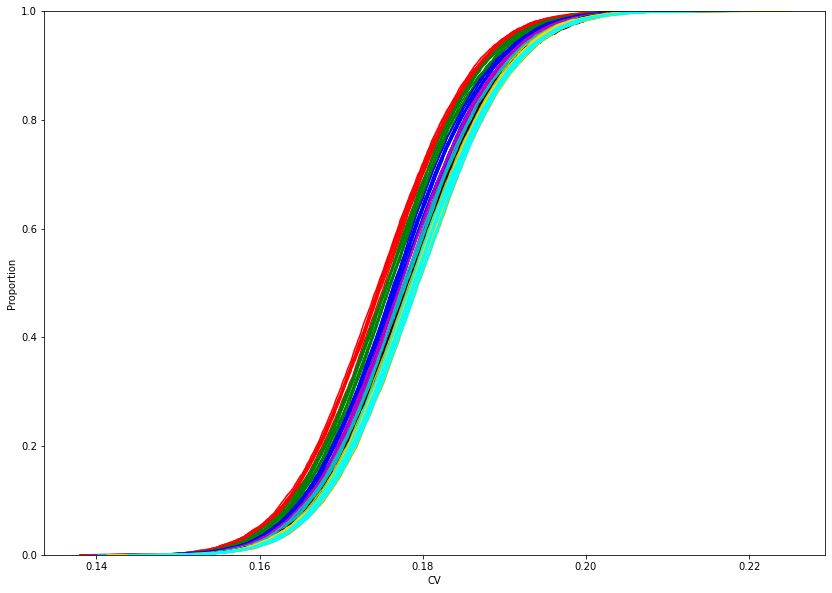

In [5]:
for i in range(1,11):
    cv = df.loc['equal',2,i]['CV']
    sns.ecdfplot(cv,color='r')
    
for i in range(1,11):
    cv = df.loc['equal',4,i]['CV']
    sns.ecdfplot(cv,color='g')
    
for i in range(1,11):
    cv = df.loc['equal',8,i]['CV']
    sns.ecdfplot(cv,color='b')
    
for i in range(1,11):
    cv = df.loc['equal',16,i]['CV']
    sns.ecdfplot(cv,color='m')
    
for i in range(1,11):
    cv = df.loc['equal',32,i]['CV']
    sns.ecdfplot(cv,color='c')
    
for i in range(1,11):
    cv = df.loc['equal',64,i]['CV']
    sns.ecdfplot(cv,color='k')
    
for i in range(1,11):
    cv = df.loc['equal',128,i]['CV']
    sns.ecdfplot(cv,color='y')
    
for i in range(1,11):
    cv = df.loc['equal',256,i]['CV']
    sns.ecdfplot(cv,color='gold')
    
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',8,i]['CV']
    sns.ecdfplot(cv,color='aqua')

The same thing happens here, the higher the resolution becomes, the closer to the continuous case the equal model gets. 

Now it could be interesting to look at the three models together, lets plot for only one resolution to get a better view of the differences. We start with low resolution and go higher from there.

To make sure the graphs are differentiable also for colorblind poepl we need to use a colorpalette with colors easily distinguishable for colorblind people. Colorblind-friendly colors: [Venngage](https://venngage.com/blog/color-blind-friendly-palette/). An option could be to use matplotlib colormap viridis. 

In [8]:
n=3
colors = plt.cm.viridis(np.linspace(0, 1, n))

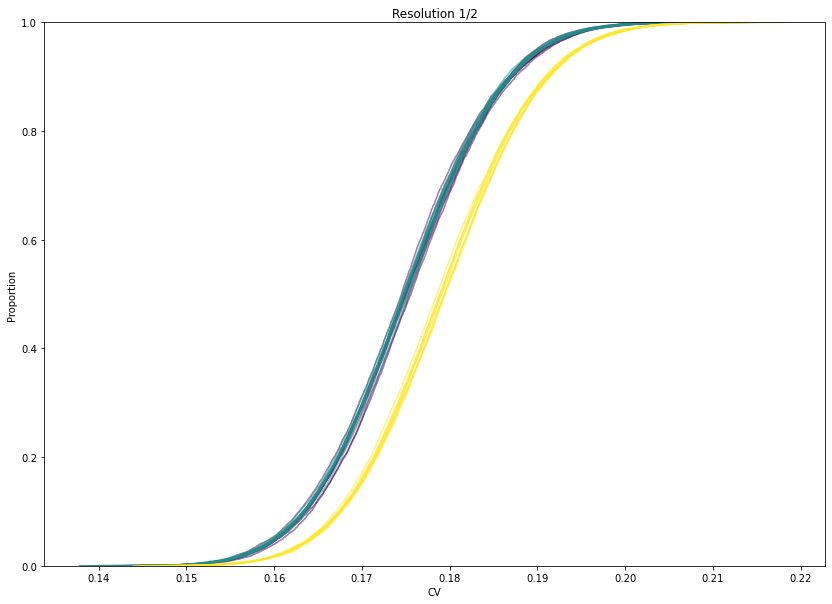

In [42]:
plt.figure();
for i in range(1,11):
    cv = df.loc['droop',2,i]['CV']
    sns.ecdfplot(cv,color=colors[0],alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',2,i]['CV']
    sns.ecdfplot(cv,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',8,i]['CV']
    sns.ecdfplot(cv,color=colors[2],alpha=0.5)

plt.title('Resolution 1/2');
#plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_cv_1_2.pdf')

The equal (green) and the droop (red) model seems to have approximately the same CV distributions. Seem to have the same distance from the continuous model.

We want to check whether the distributions ar enormal, we do this by plotting normplots and by performing scipy tests. We use the scipy.stats.normaltest, which has the nullhypothesis that a sample comes from a normal distribution. We reject the null hypothesis if the p-value is less than the significance level we choose, e.g. alpha = 1e-3. Make a function to easily test this for all seed values in one model.

In [55]:
def norm_tests(data):
    alpha = 1e-3
    rejects = 0
    for i in range(1,11):
        x = data[i].values
        k2, p = normaltest(x)
        if p < alpha:
            rejects +=1
    return rejects

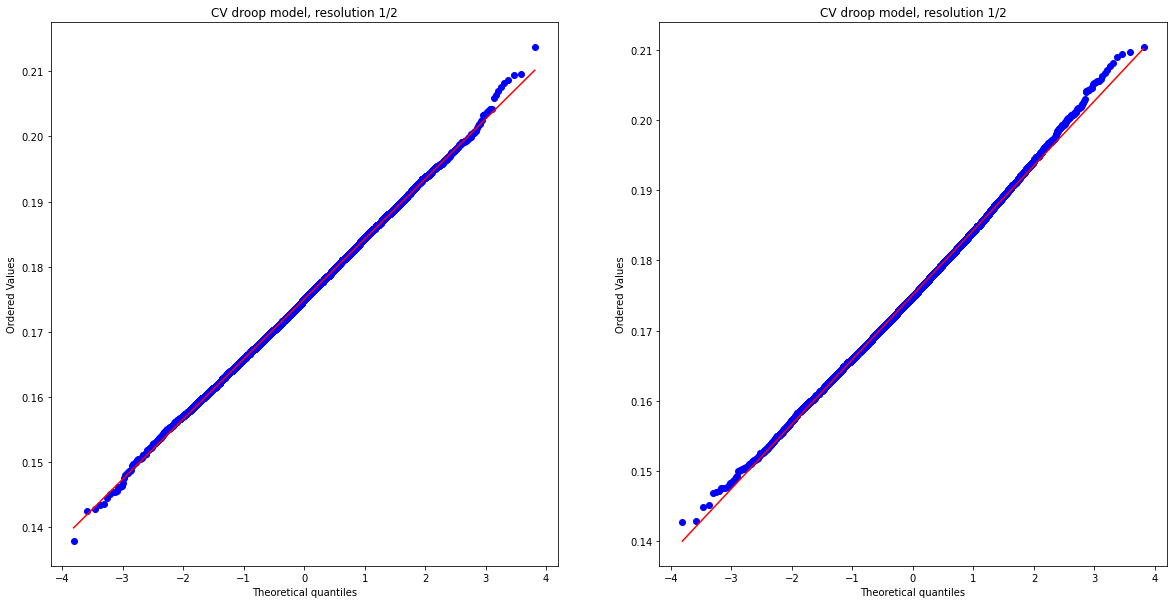

In [80]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['droop',res[0],9]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV droop model, resolution 1/2');
ax2 = plt.subplot(122)
cv2 = df.loc['droop',res[0],10]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV droop model, resolution 1/2');

plt.show();

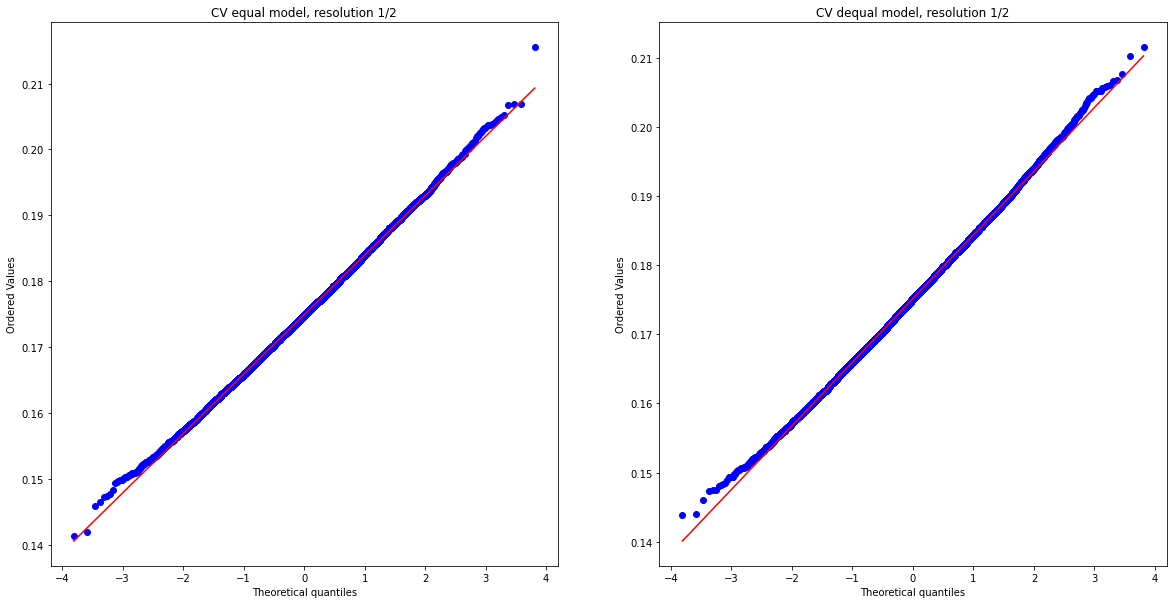

In [83]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['equal',res[0],1]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV equal model, resolution 1/2');
ax2 = plt.subplot(122)
cv2 = df.loc['equal',res[0],5]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV dequal model, resolution 1/2');

plt.show();

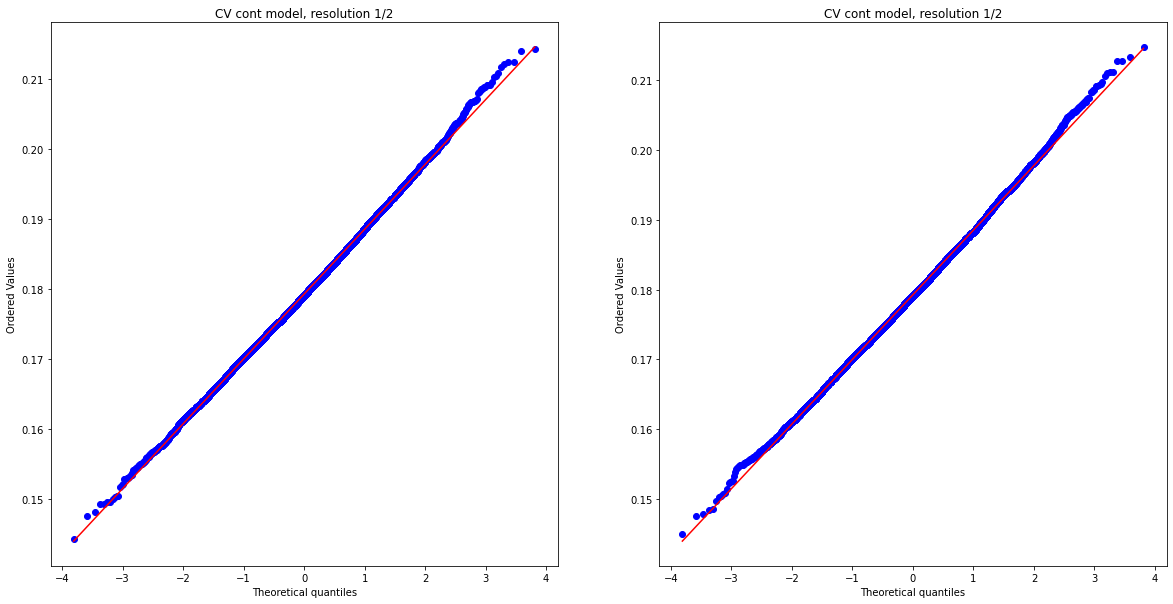

In [84]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['continuous',res[2],1]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV cont model, resolution 1/2');
ax2 = plt.subplot(122)
cv2 = df.loc['continuous',res[2],5]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV cont model, resolution 1/2');

plt.show();

Just replace the seed values to see all plots. But it looks like most of the distributions are quite normally distributed, a few outliers at each end.

In [57]:
r01 = norm_tests(df.loc['droop',res[0]]['CV'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[0]]['CV'])
print(f'{r02} tests failed')
r03 = norm_tests(df.loc['continuous',res[2]]['CV'])
print(f'{r03} tests failed')

5 tests failed
4 tests failed
5 tests failed


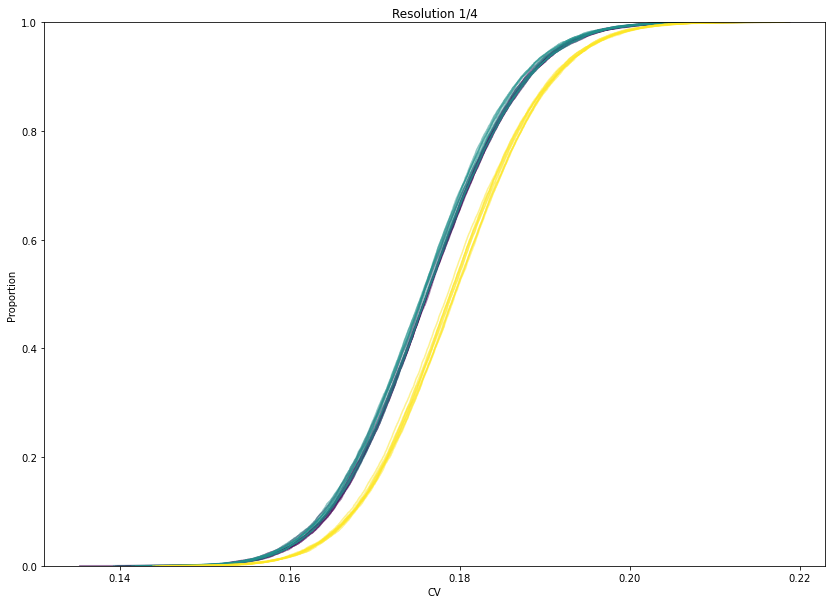

In [28]:
plt.figure();
for i in range(1,11):
    cv = df.loc['droop',4,i]['CV']
    sns.ecdfplot(cv,color=colors[0],alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',4,i]['CV']
    sns.ecdfplot(cv,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',8,i]['CV']
    sns.ecdfplot(cv,color=colors[2],alpha=0.5)

plt.title('Resolution 1/4');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_cv_1_4.pdf')

Once again the droop and equal model seem to have approximately the same CV distributions. A little closer to the true model.

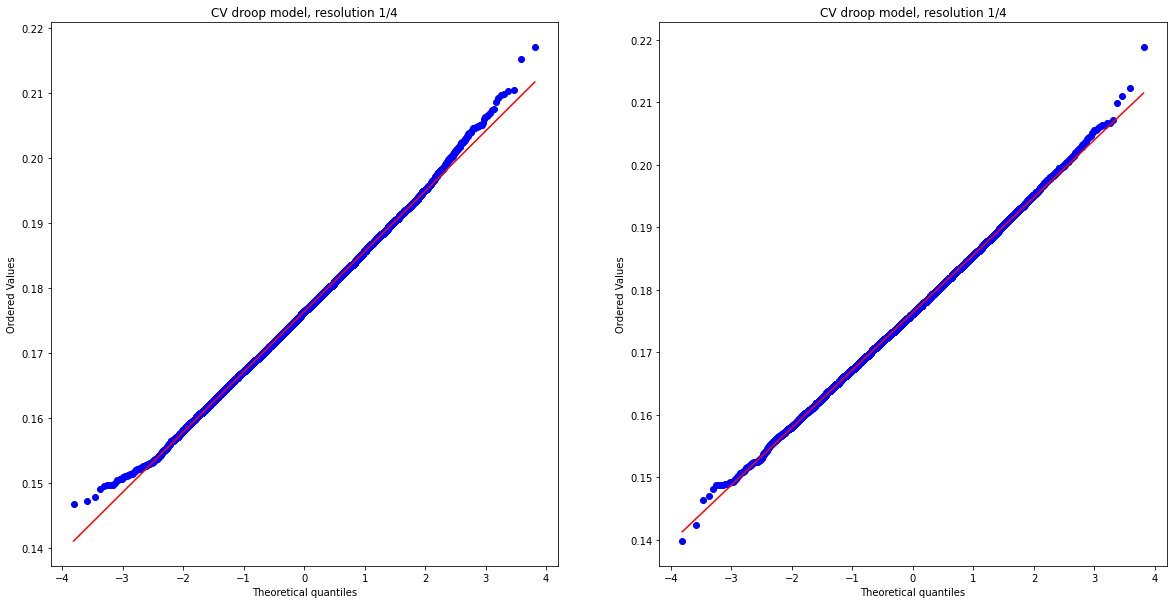

In [85]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['droop',res[1],9]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV droop model, resolution 1/4');
ax2 = plt.subplot(122)
cv2 = df.loc['droop',res[1],10]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV droop model, resolution 1/4');

plt.show();

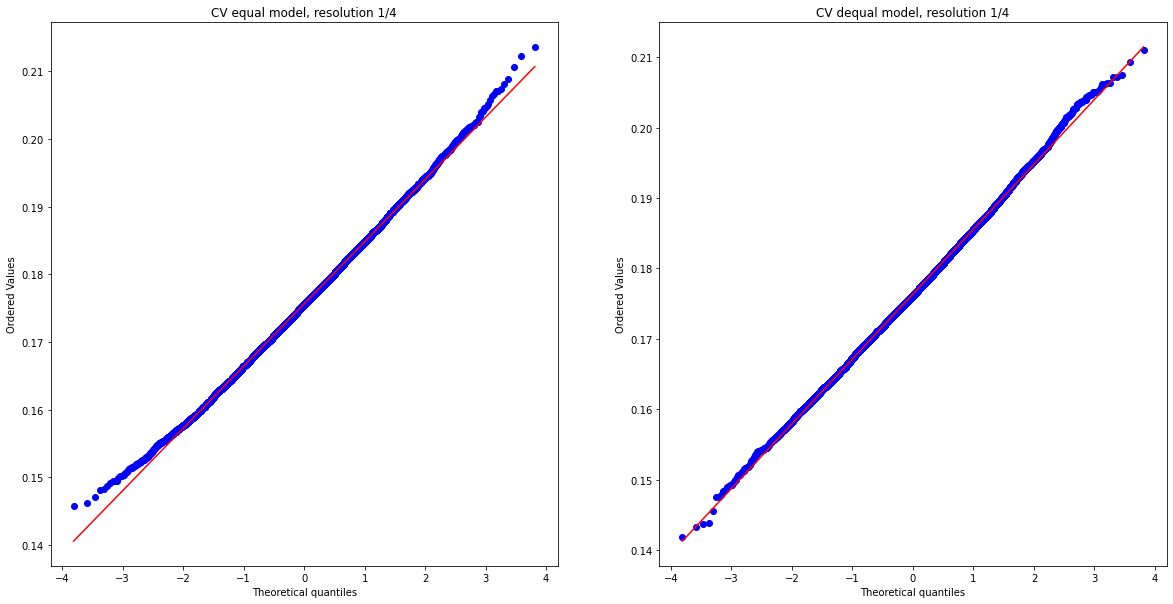

In [86]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['equal',res[1],1]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV equal model, resolution 1/4');
ax2 = plt.subplot(122)
cv2 = df.loc['equal',res[1],5]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV dequal model, resolution 1/4');

plt.show();

Seems like the distributions are quite normally distributed, with a few outliers.

In [58]:
r01 = norm_tests(df.loc['droop',res[1]]['CV'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[1]]['CV'])
print(f'{r02} tests failed')

7 tests failed
7 tests failed


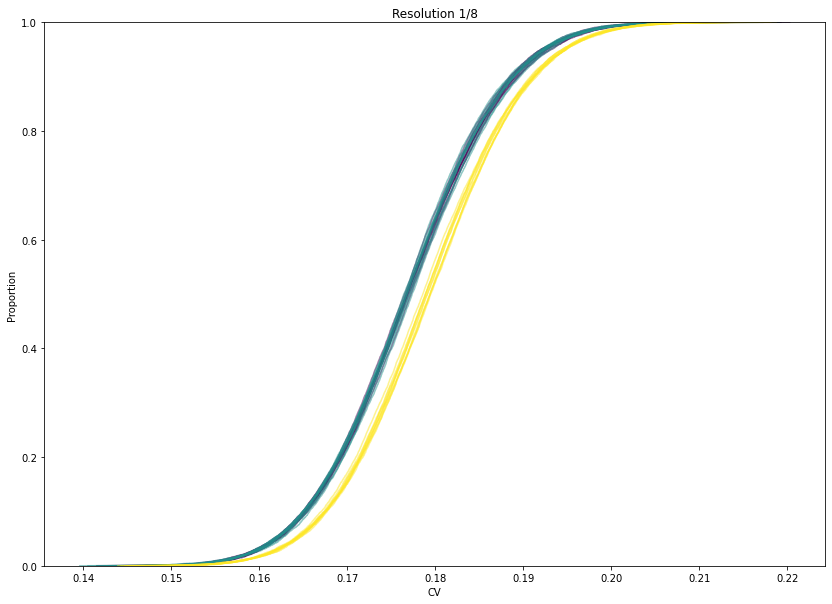

In [29]:
plt.figure();
for i in range(1,11):
    cv = df.loc['droop',8,i]['CV']
    sns.ecdfplot(cv,color=colors[0],alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',8,i]['CV']
    sns.ecdfplot(cv,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',8,i]['CV']
    sns.ecdfplot(cv,color=colors[2],alpha=0.5)

plt.title('Resolution 1/8');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_cv_1_8.pdf')

Same again, equal and droop model approximately same CV distributions. CLoser to true values as resolution is higher.

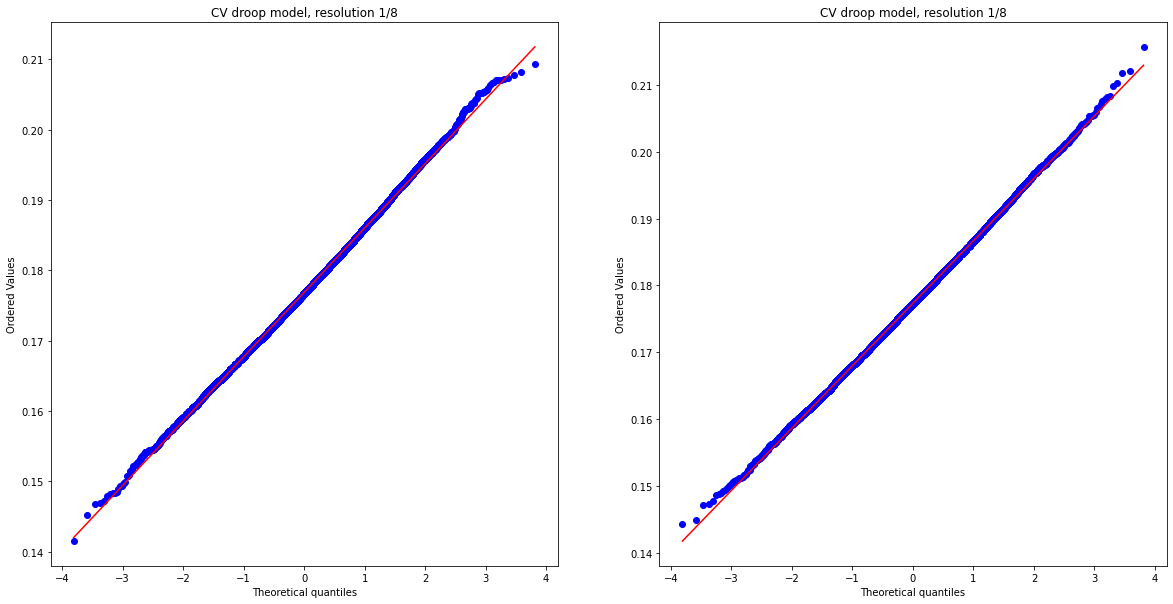

In [87]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['droop',res[2],9]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV droop model, resolution 1/8');
ax2 = plt.subplot(122)
cv2 = df.loc['droop',res[2],10]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV droop model, resolution 1/8');

plt.show();

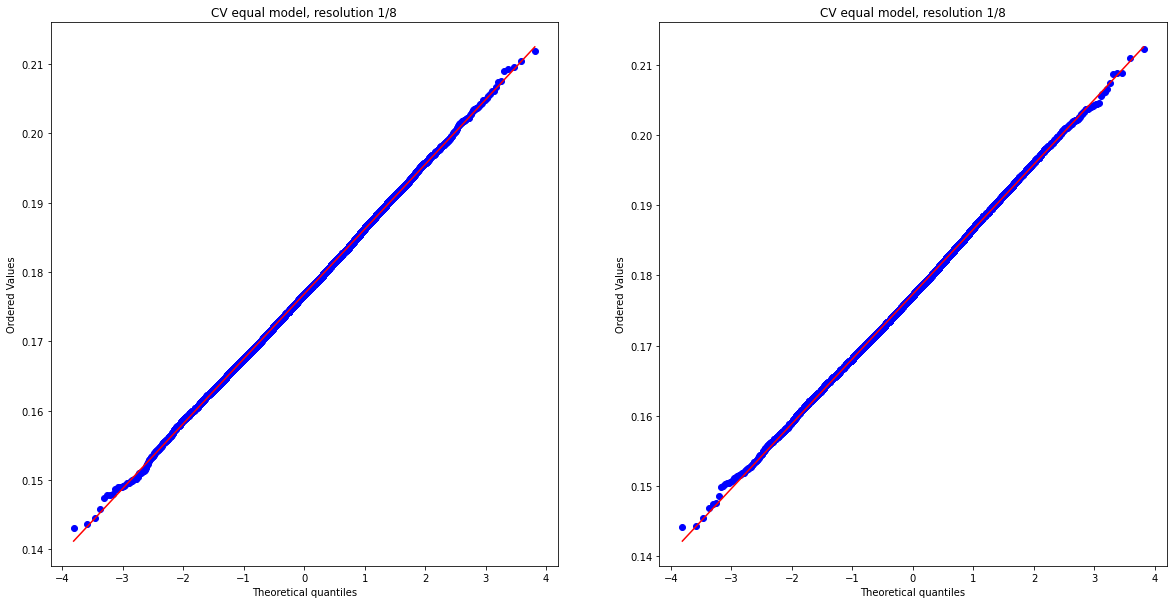

In [89]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['equal',res[2],1]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV equal model, resolution 1/8');
ax2 = plt.subplot(122)
cv2 = df.loc['equal',res[2],5]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV equal model, resolution 1/8');

plt.show();

Quite normally distributed, a few outliers.

In [59]:
r01 = norm_tests(df.loc['droop',res[2]]['CV'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[2]]['CV'])
print(f'{r02} tests failed')

4 tests failed
5 tests failed


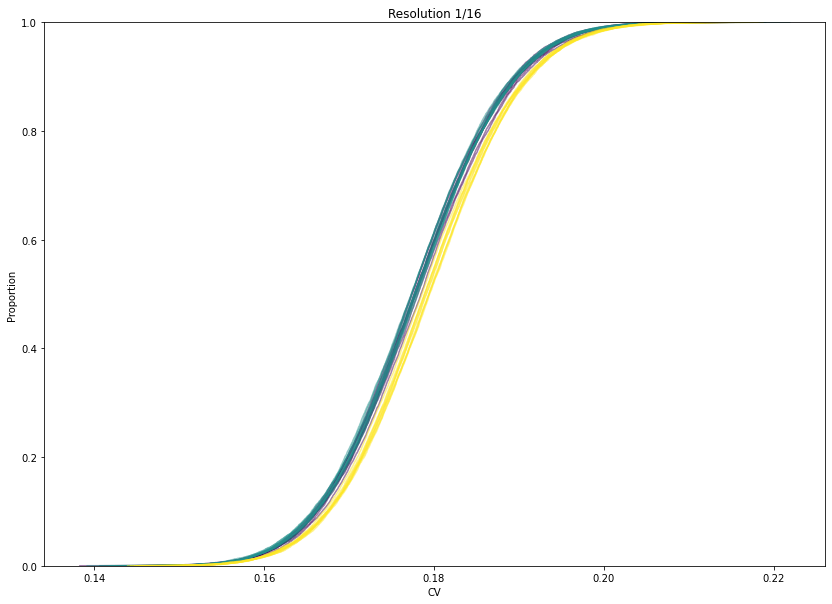

In [30]:
plt.figure();
for i in range(1,11):
    cv = df.loc['droop',16,i]['CV']
    sns.ecdfplot(cv,color=colors[0],alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',16,i]['CV']
    sns.ecdfplot(cv,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',8,i]['CV']
    sns.ecdfplot(cv,color=colors[2],alpha=0.5)

plt.title('Resolution 1/16');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_cv_1_16.pdf')

Looks like droop (red) and equal (green) model are quite equal, but seems like the droop model is closer to the real values, plot a zoomed in version just to double check:

(0.6, 0.8)

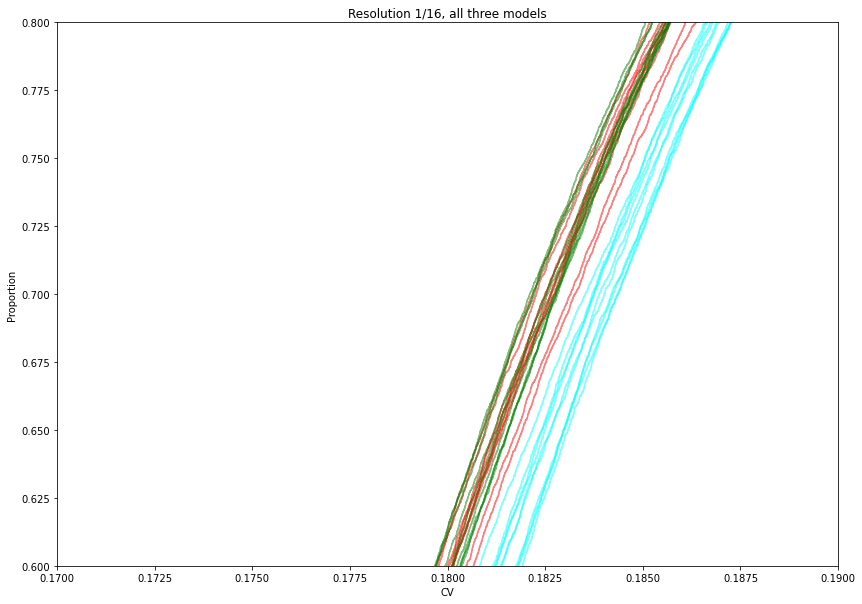

In [9]:
for i in range(1,11):
    cv = df.loc['droop',res[3],i]['CV']
    sns.ecdfplot(cv,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',res[3],i]['CV']
    sns.ecdfplot(cv,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',res[2],i]['CV']
    sns.ecdfplot(cv,color='aqua',alpha=0.5)
plt.title('Resolution 1/16, all three models');
plt.xlim(0.17,0.19)
plt.ylim(0.6,0.8)

See that at least for two seed values the droop (green) model is closer to the real values (aqua). But this is just for two seed values, not for all.

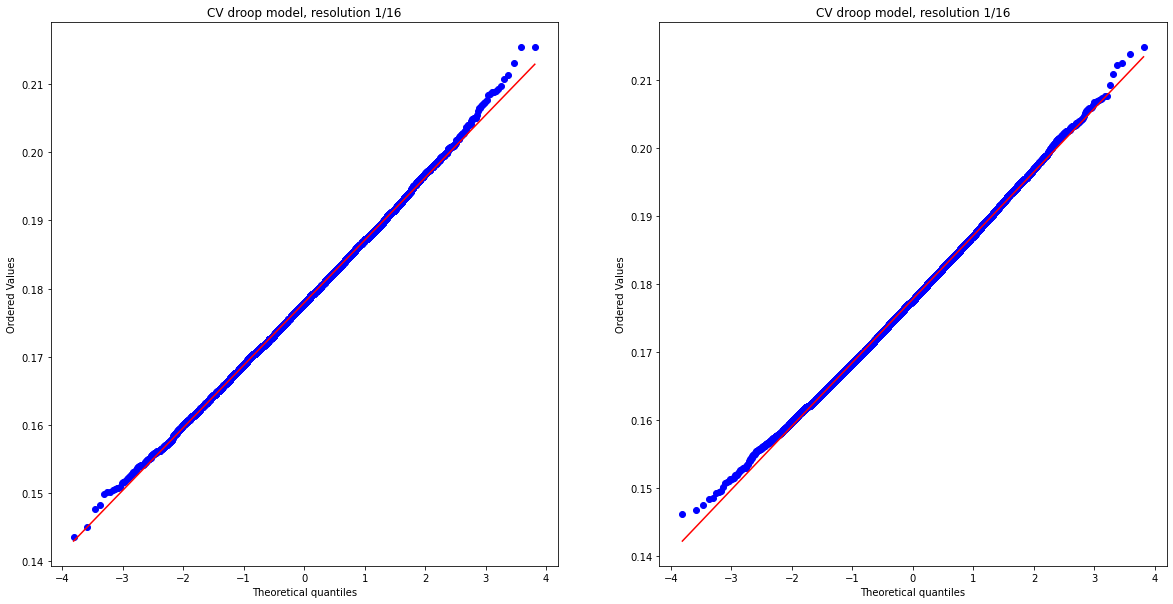

In [90]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['droop',res[3],9]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV droop model, resolution 1/16');
ax2 = plt.subplot(122)
cv2 = df.loc['droop',res[3],10]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV droop model, resolution 1/16');

plt.show();

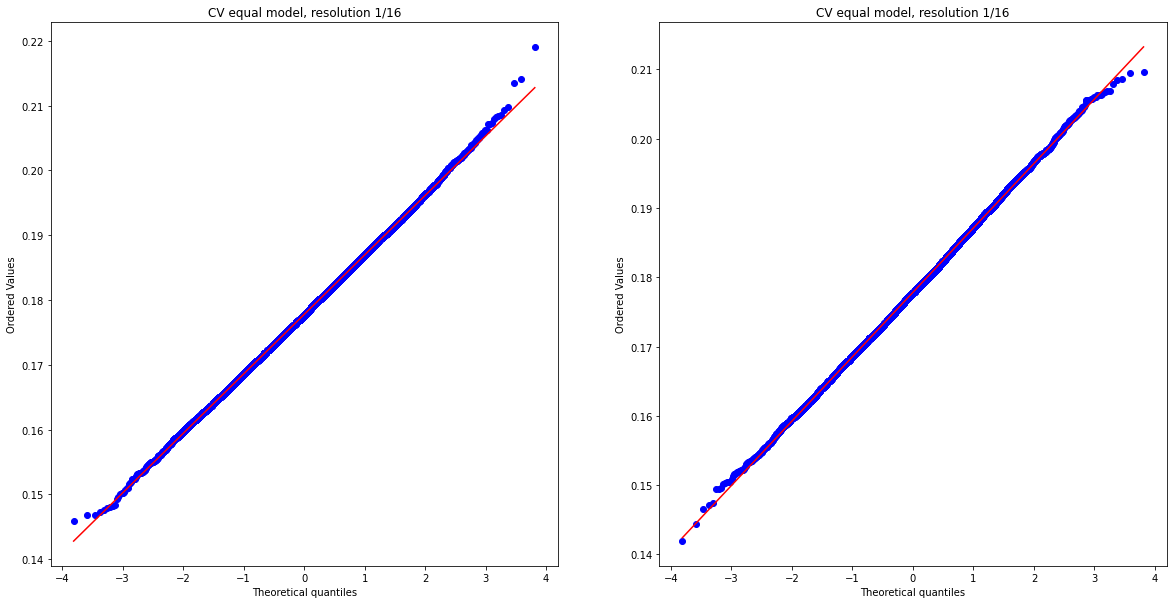

In [91]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['equal',res[3],9]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV equal model, resolution 1/16');
ax2 = plt.subplot(122)
cv2 = df.loc['equal',res[3],10]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV equal model, resolution 1/16');

plt.show();

Quite normally distributed, a few outliers.

In [61]:
r01 = norm_tests(df.loc['droop',res[3]]['CV'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[3]]['CV'])
print(f'{r02} tests failed')

5 tests failed
2 tests failed


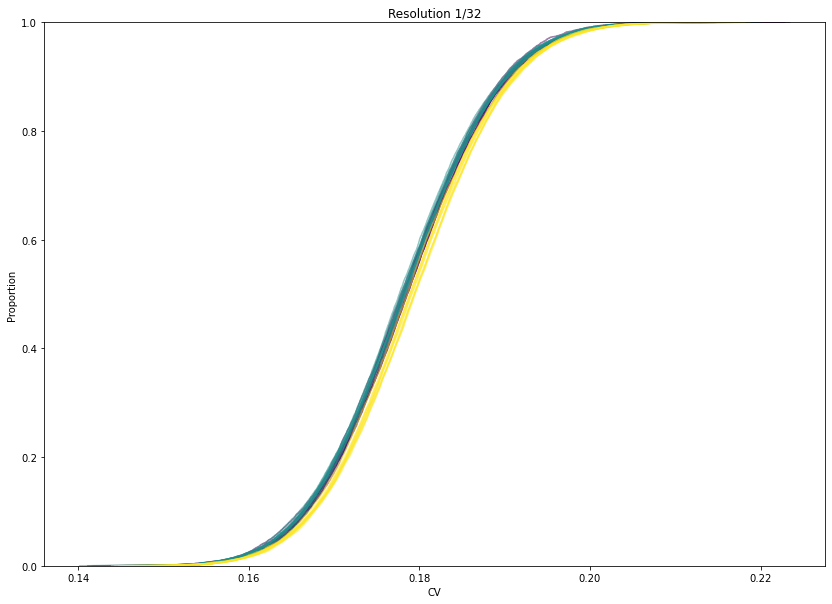

In [31]:
plt.figure();
for i in range(1,11):
    cv = df.loc['droop',32,i]['CV']
    sns.ecdfplot(cv,color=colors[0],alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',32,i]['CV']
    sns.ecdfplot(cv,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',8,i]['CV']
    sns.ecdfplot(cv,color=colors[2],alpha=0.5)

plt.title('Resolution 1/32');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_cv_1_32.pdf')

Not much more difference here. Still pretty equal, zoom in just in case.

(0.5, 0.8)

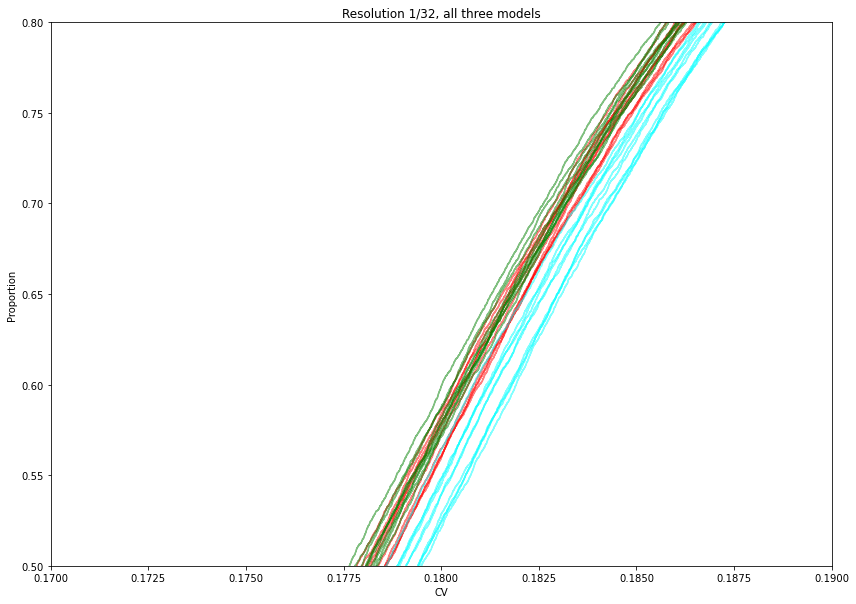

In [11]:
for i in range(1,11):
    cv = df.loc['droop',res[4],i]['CV']
    sns.ecdfplot(cv,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',res[4],i]['CV']
    sns.ecdfplot(cv,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',res[2],i]['CV']
    sns.ecdfplot(cv,color='aqua',alpha=0.5)
plt.title('Resolution 1/32, all three models');
plt.xlim(0.17,0.19)
plt.ylim(0.5,0.8)

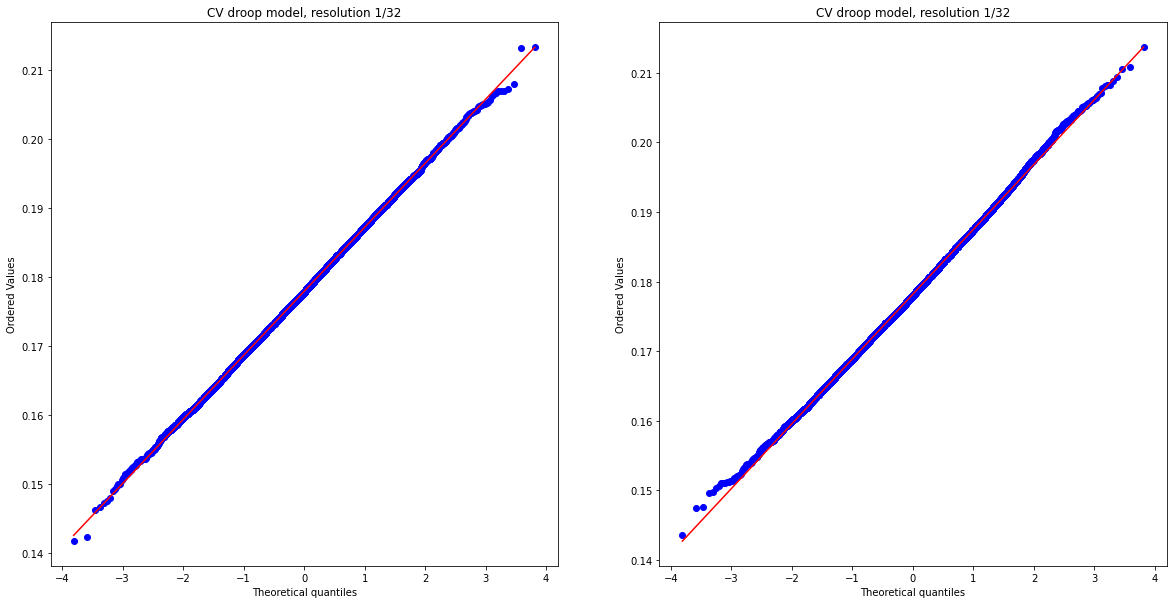

In [9]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['droop',res[4],7]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV droop model, resolution 1/32');
ax2 = plt.subplot(122)
cv2 = df.loc['droop',res[4],8]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV droop model, resolution 1/32');

plt.show();

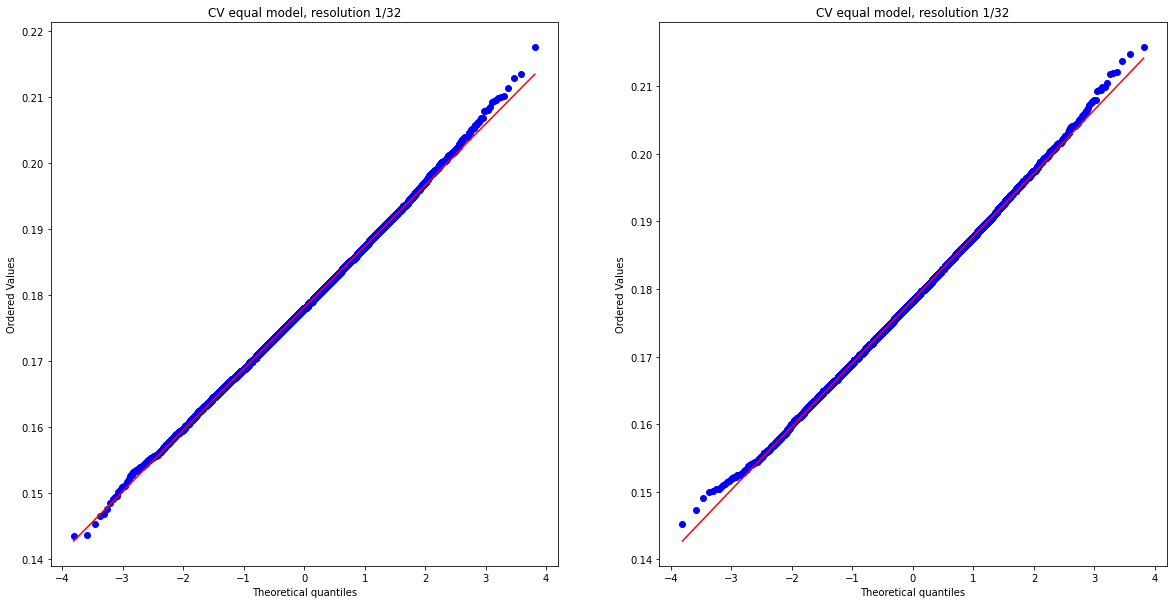

In [13]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['equal',res[4],7]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV equal model, resolution 1/32');
ax2 = plt.subplot(122)
cv2 = df.loc['equal',res[4],8]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV equal model, resolution 1/32');

plt.show();

See that the distributions are quite normally distributed, a few outliers only.

In [62]:
r01 = norm_tests(df.loc['droop',res[4]]['CV'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[4]]['CV'])
print(f'{r02} tests failed')

4 tests failed
5 tests failed


Some of the seeds in the droop (red) model closer to true values than the equal (green) model. Interesting. But not the case for all seed values. Lets continue for all resolutions.

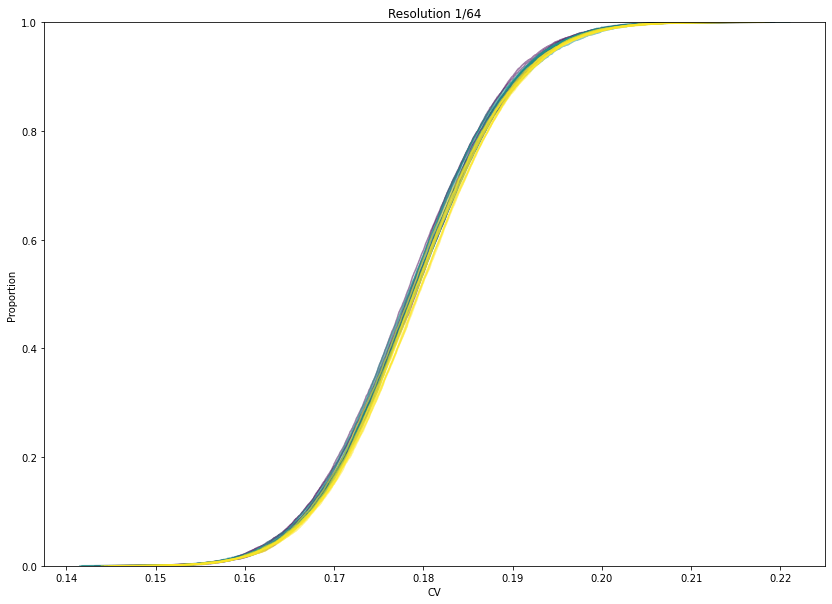

In [32]:
plt.figure();
for i in range(1,11):
    cv = df.loc['droop',64,i]['CV']
    sns.ecdfplot(cv,color=colors[0],alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',64,i]['CV']
    sns.ecdfplot(cv,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',8,i]['CV']
    sns.ecdfplot(cv,color=colors[2],alpha=0.5)

plt.title('Resolution 1/64');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_cv_1_64.pdf')

Now the equal (red) model seems closer to true values, zoom in:

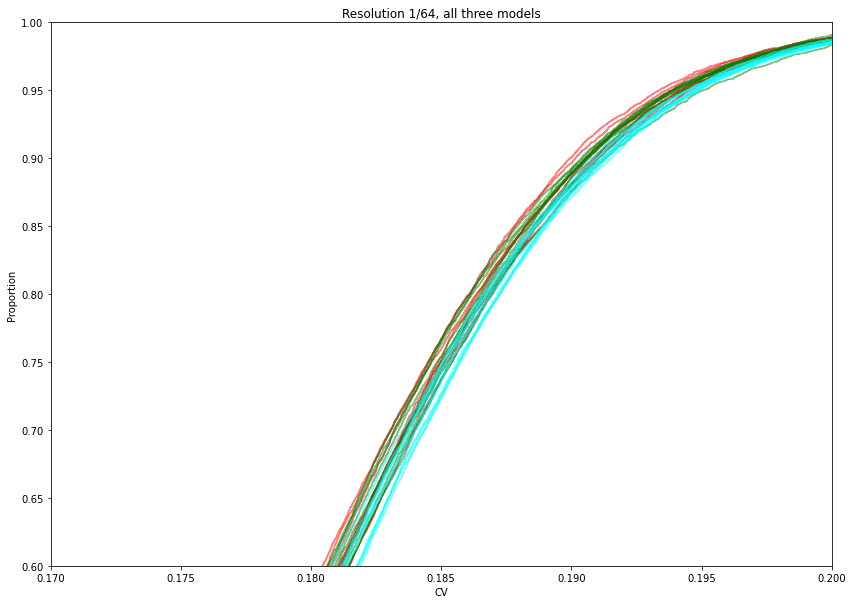

In [13]:
for i in range(1,11):
    cv = df.loc['droop',res[5],i]['CV']
    sns.ecdfplot(cv,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',res[5],i]['CV']
    sns.ecdfplot(cv,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',res[2],i]['CV']
    sns.ecdfplot(cv,color='aqua',alpha=0.5)
plt.title('Resolution 1/64, all three models');
plt.xlim(0.17,0.20);
plt.ylim(0.6,1.0);

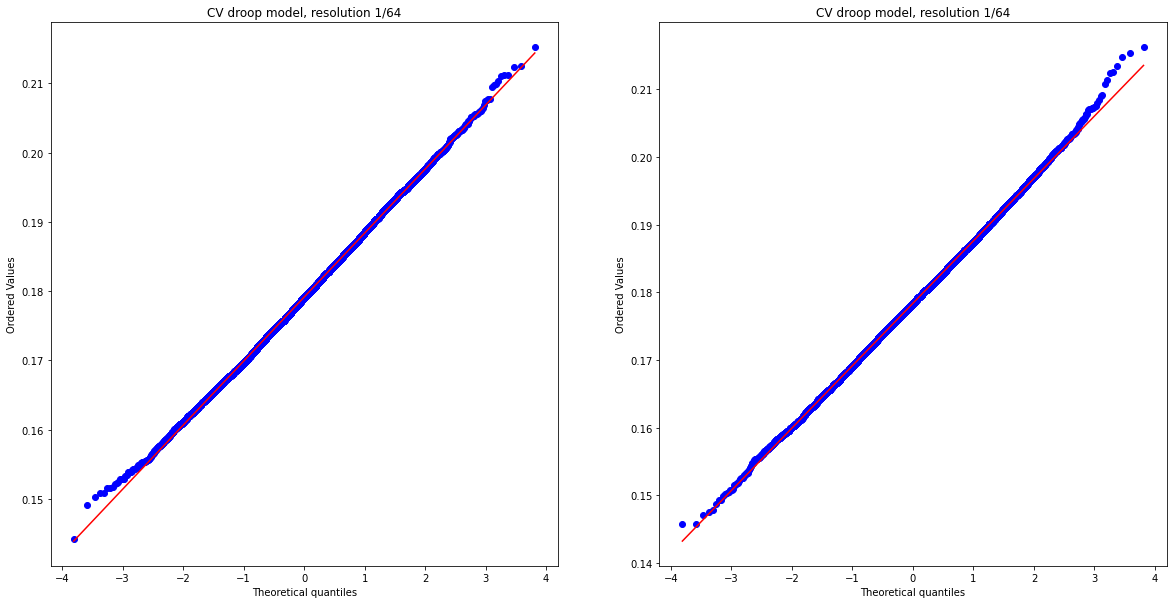

In [19]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['droop',res[5],9]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV droop model, resolution 1/64');
ax2 = plt.subplot(122)
cv2 = df.loc['droop',res[5],10]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV droop model, resolution 1/64');

plt.show();

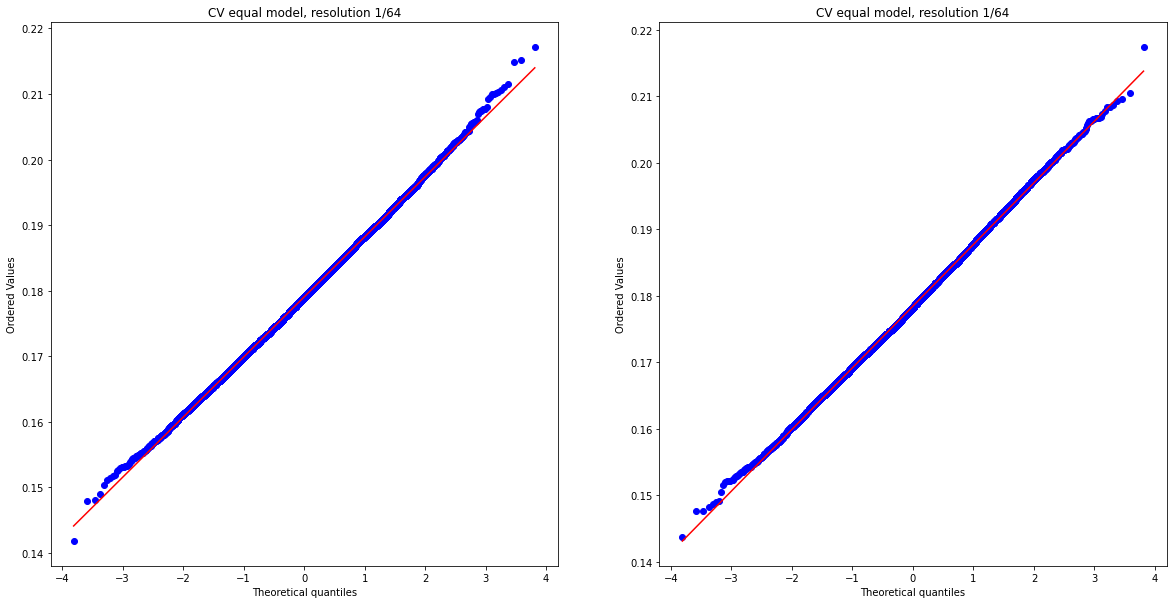

In [24]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['equal',res[5],7]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV equal model, resolution 1/64');
ax2 = plt.subplot(122)
cv2 = df.loc['equal',res[5],8]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV equal model, resolution 1/64');

plt.show();

The distribution are normally distributed, a few outliers.

Not clear if one of the models is closer or not. Seems pretty similar.

In [63]:
r01 = norm_tests(df.loc['droop',res[5]]['CV'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[5]]['CV'])
print(f'{r02} tests failed')

2 tests failed
2 tests failed


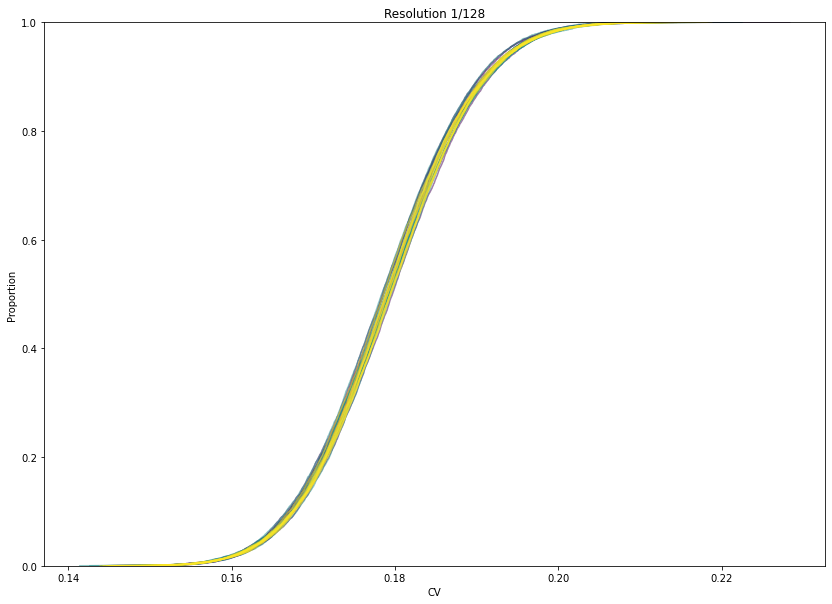

In [33]:
plt.figure();
for i in range(1,11):
    cv = df.loc['droop',128,i]['CV']
    sns.ecdfplot(cv,color=colors[0],alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',128,i]['CV']
    sns.ecdfplot(cv,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',8,i]['CV']
    sns.ecdfplot(cv,color=colors[2],alpha=0.5)

plt.title('Resolution 1/128');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_cv_1_128.pdf')

Definetly harder to see a difference here.

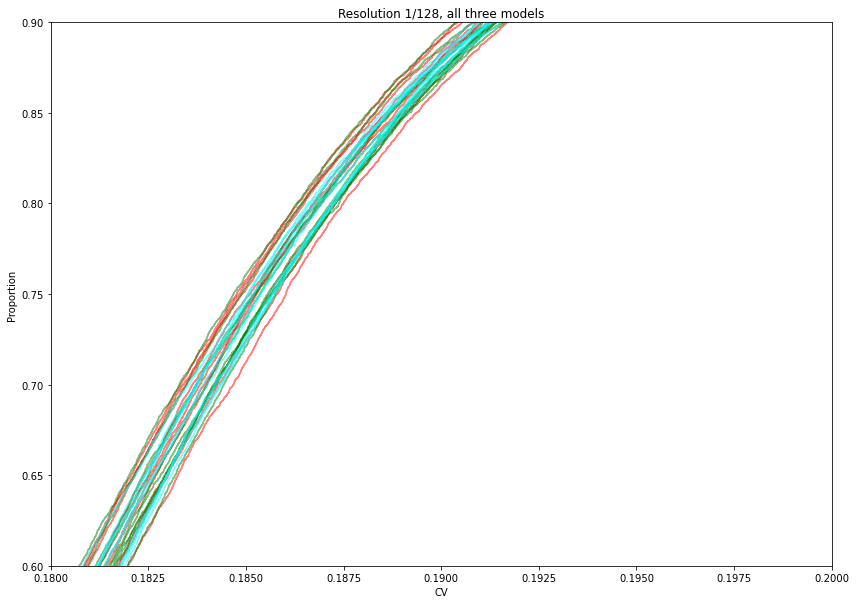

In [15]:
for i in range(1,11):
    cv = df.loc['droop',res[6],i]['CV']
    sns.ecdfplot(cv,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',res[6],i]['CV']
    sns.ecdfplot(cv,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',res[2],i]['CV']
    sns.ecdfplot(cv,color='aqua',alpha=0.5)
plt.title('Resolution 1/128, all three models');
plt.xlim(0.18,0.2);
plt.ylim(0.6,0.9);

No clear difference.

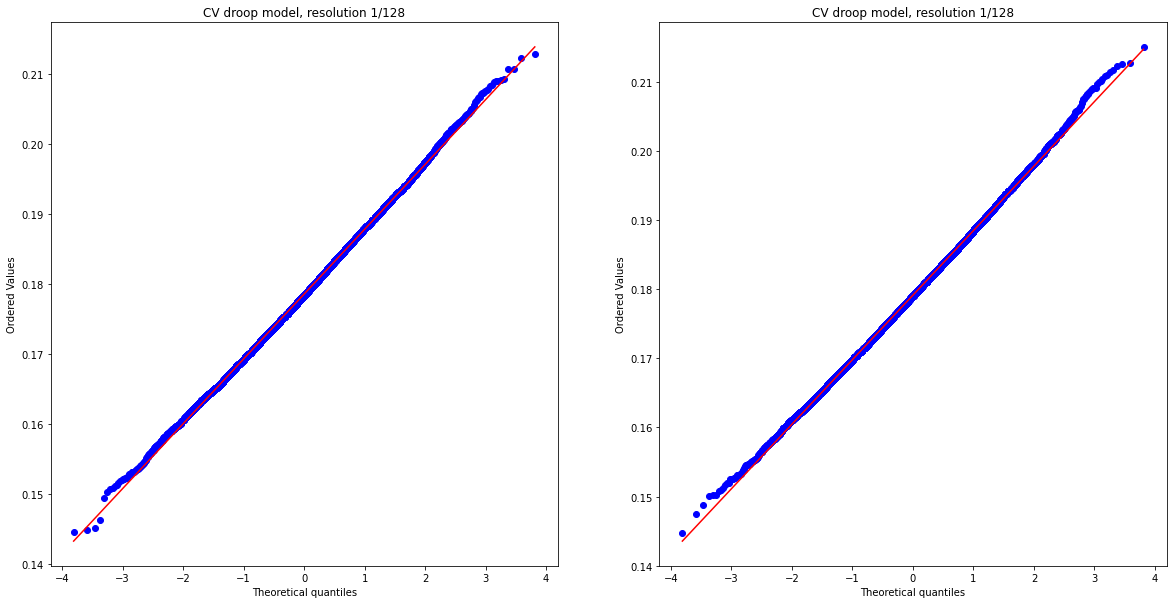

In [30]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['droop',res[6],9]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV droop model, resolution 1/128');
ax2 = plt.subplot(122)
cv2 = df.loc['droop',res[6],10]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV droop model, resolution 1/128');

plt.show();

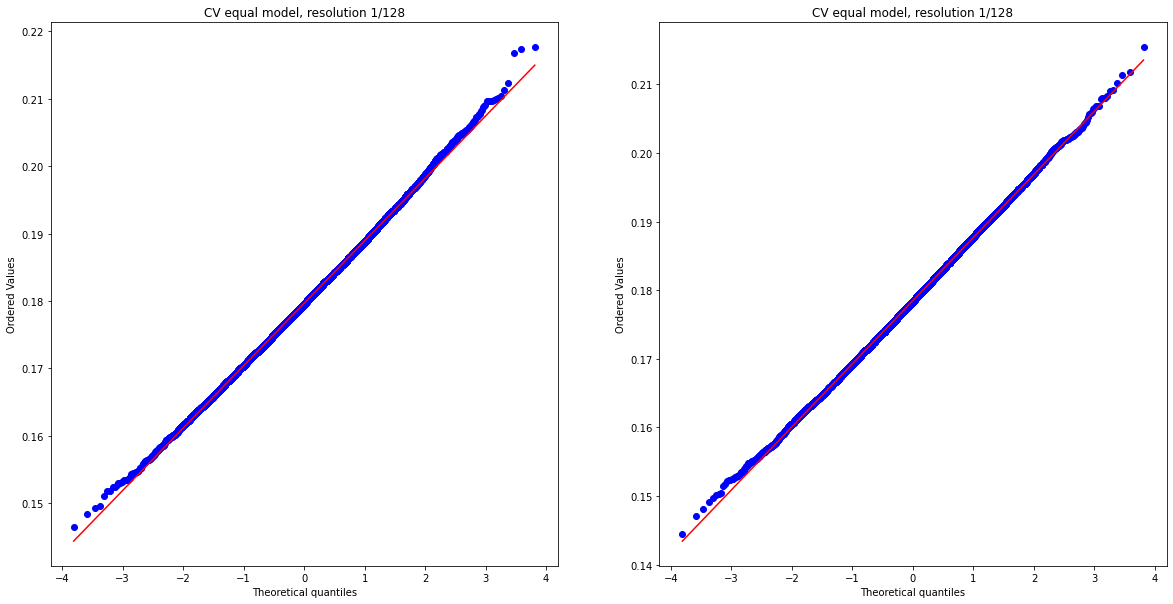

In [35]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['equal',res[6],7]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV equal model, resolution 1/128');
ax2 = plt.subplot(122)
cv2 = df.loc['equal',res[6],8]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV equal model, resolution 1/128');

plt.show();

Again, the distributions seem quite normally distributed except a few outliers.

In [64]:
r01 = norm_tests(df.loc['droop',res[6]]['CV'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[6]]['CV'])
print(f'{r02} tests failed')

2 tests failed
4 tests failed


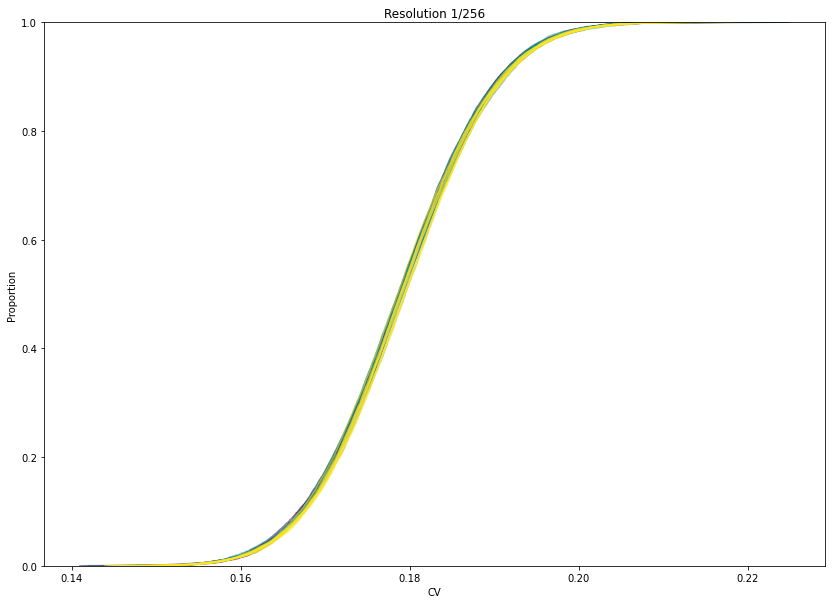

In [34]:
plt.figure();
for i in range(1,11):
    cv = df.loc['droop',256,i]['CV']
    sns.ecdfplot(cv,color=colors[0],alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',256,i]['CV']
    sns.ecdfplot(cv,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',8,i]['CV']
    sns.ecdfplot(cv,color=colors[2],alpha=0.5)

plt.title('Resolution 1/256');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_cv_1_256.pdf')

No clear difference, zooming in:

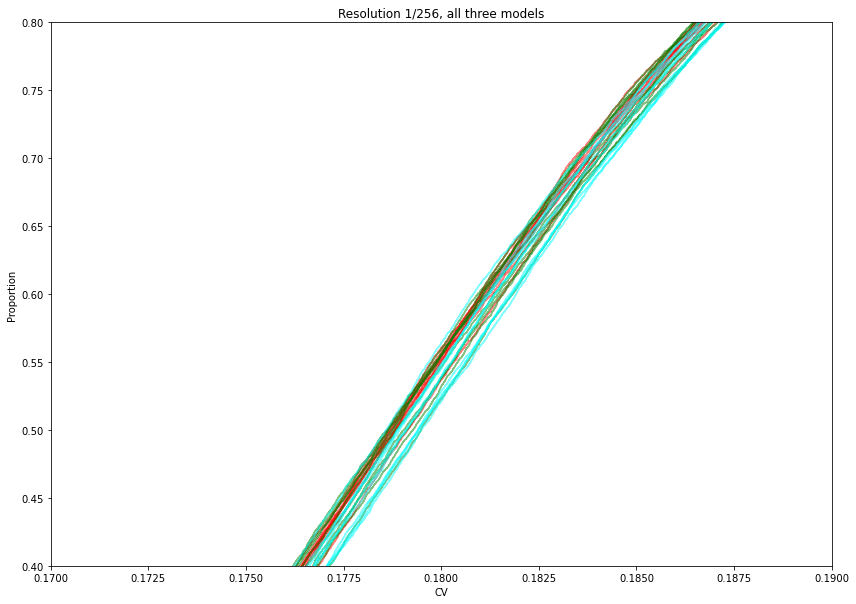

In [17]:
for i in range(1,11):
    cv = df.loc['droop',res[7],i]['CV']
    sns.ecdfplot(cv,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cv = df.loc['equal',res[7],i]['CV']
    sns.ecdfplot(cv,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cv = df.loc['continuous',res[2],i]['CV']
    sns.ecdfplot(cv,color='aqua',alpha=0.5)
plt.title('Resolution 1/256, all three models');
plt.xlim(0.17,0.19);
plt.ylim(0.4,0.8);

No clear difference.

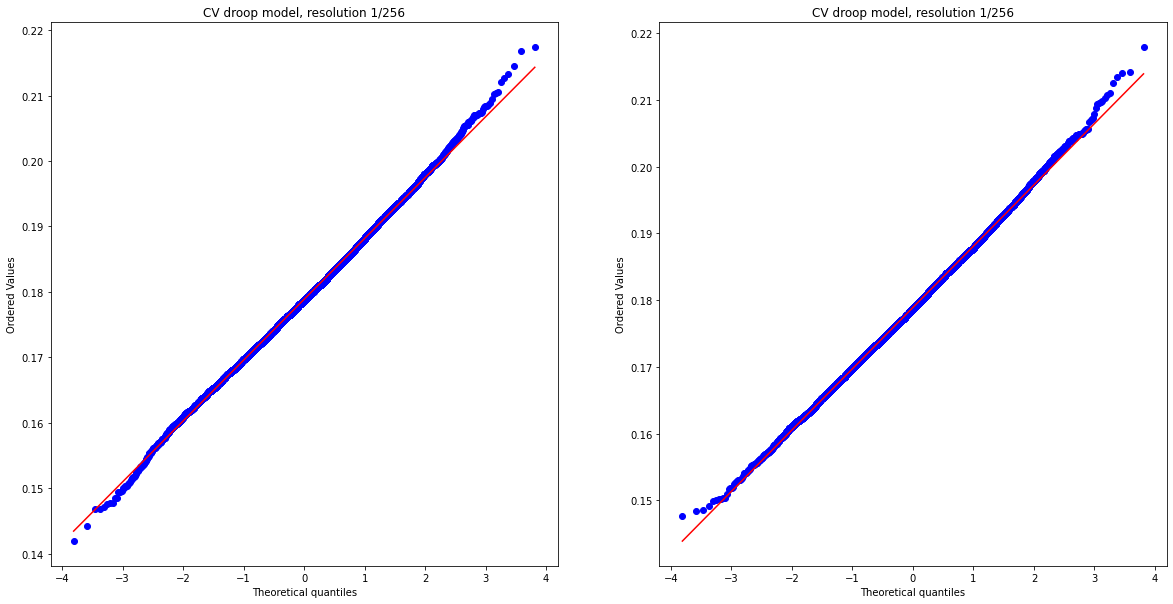

In [40]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['droop',res[7],7]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV droop model, resolution 1/256');
ax2 = plt.subplot(122)
cv2 = df.loc['droop',res[7],8]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV droop model, resolution 1/256');

plt.show();

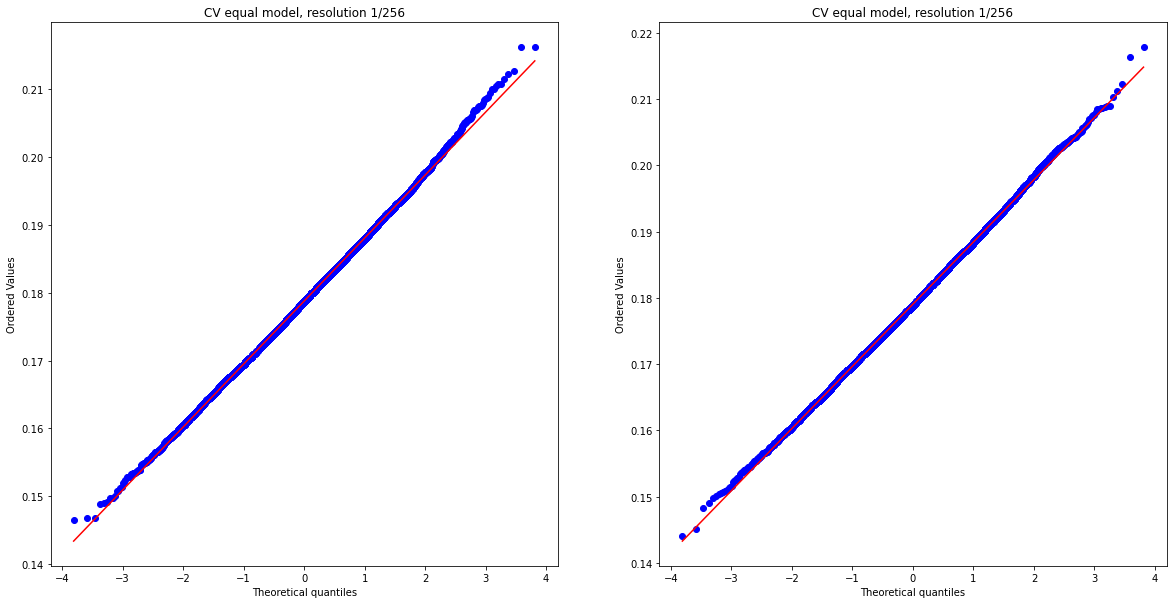

In [45]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['equal',res[7],5]['CV']
probplot(list(cv1.values),plot=plt);
plt.title('CV equal model, resolution 1/256');
ax2 = plt.subplot(122)
cv2 = df.loc['equal',res[7],6]['CV']
probplot(list(cv2.values),plot=plt);
plt.title('CV equal model, resolution 1/256');

plt.show();

See that the distributions are quite normally distributed, a few outliers.

In [65]:
r01 = norm_tests(df.loc['droop',res[7]]['CV'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[7]]['CV'])
print(f'{r02} tests failed')

4 tests failed
2 tests failed


Overall there was no clear difference between the three models. In the beginning for the lower resolutions it seemed like the droop model was slightly closer to the true model than the equal model was. But this was only for a few of the seeded simulations. Not for all. So not enough proof to say that one model was more similar to the real model than the other. Will conclude with the models being quite similar, when judgning based only on the CV distributions and plotting. Could be another case with other types of statistics or other ways of judging, like e.g. for the KL divergences. Will look more into this later. Let us now move on to the FR distributions.

# FR

Note: The FR values are discrete, so the basic ecfplot function will give us step funcitons, maybe try to smoothen it out just for the purpose of visulaizing. 

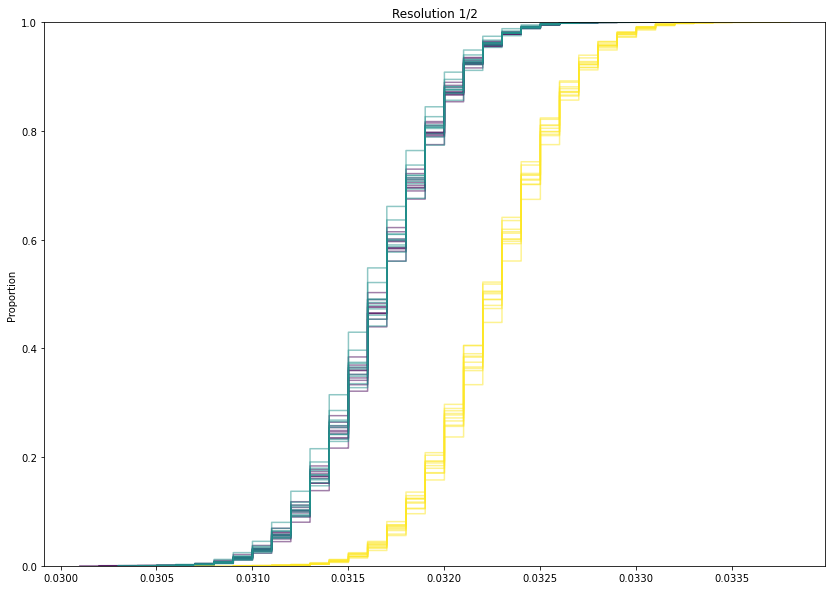

In [44]:
plt.figure();
for i in range(1,11):
    fr = [float(x) for x in df.loc['droop',2,i]['FR']]
    sns.ecdfplot(fr,color=colors[0],alpha=0.5)  
    
    
for i in range(1,11):
    fr = [float(x) for x in df.loc['equal',2,i]['FR']]
    sns.ecdfplot(fr,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    fr = [float(x) for x in df.loc['continuous',8,i]['FR']]
    sns.ecdfplot(fr,color=colors[2],alpha=0.5)
    
plt.title('Resolution 1/2');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_fr_1_2.pdf')

Seems a little discrete, but we just accept it? Yes. Harder to see differences this way.

Do not see clear difference between droop (red) and equal (green) model.

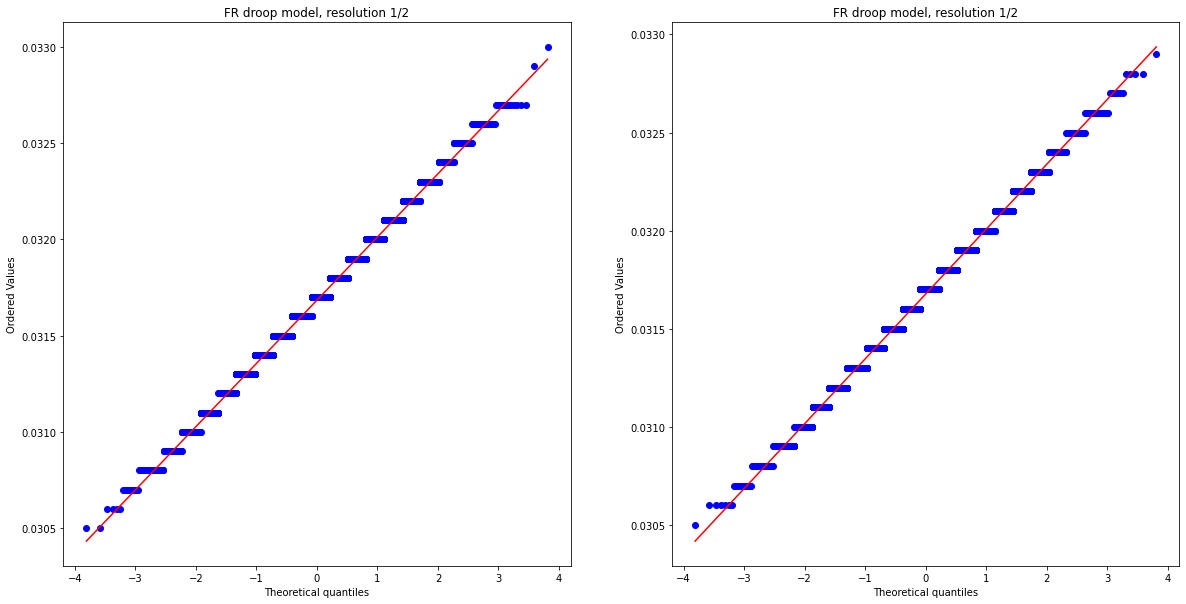

In [66]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)

fr1 = [float(x) for x in df.loc['droop',res[0],1]['FR']]
probplot(fr1,plot=plt);
plt.title('FR droop model, resolution 1/2');
ax2 = plt.subplot(122)

fr2 = [float(x) for x in df.loc['droop',res[0],2]['FR']]
probplot(fr2,plot=plt);
plt.title('FR droop model, resolution 1/2');

plt.show();

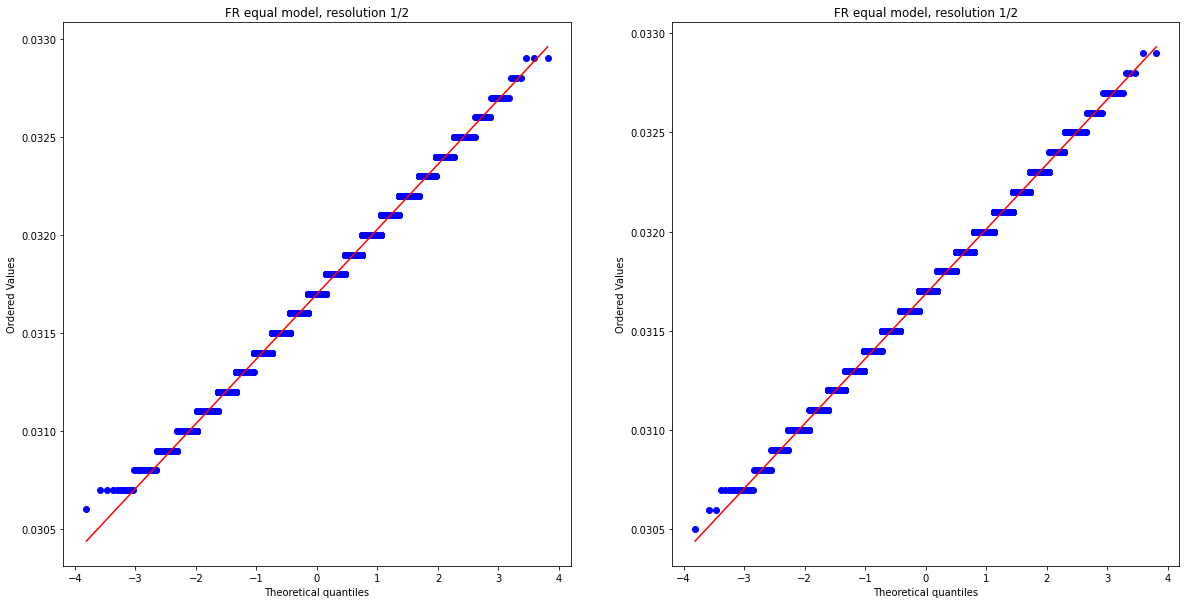

In [67]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)

fr1 = [float(x) for x in df.loc['equal',res[0],1]['FR']]
probplot(fr1,plot=plt);
plt.title('FR equal model, resolution 1/2');
ax2 = plt.subplot(122)

fr2 = [float(x) for x in df.loc['equal',res[0],2]['FR']]
probplot(fr2,plot=plt);
plt.title('FR equal model, resolution 1/2');

plt.show();

Hmm, not quite normal with the points on the sides of the line instead of straight on it, this must be because of the discrete values. Maybe better to do the tests here.

In [68]:
def norm_tests_fr(data):
    alpha = 1e-3
    rejects = 0
    for i in range(1,11):
        d = data[i].values
        x = [float(y) for y in d]
        k2, p = normaltest(x)
        if p < alpha:
            rejects +=1
    return rejects

In [77]:
r01 = norm_tests_fr(df.loc['droop',res[0]]['FR'])
print(f'{r01} tests failed')
r02 = norm_tests_fr(df.loc['equal',res[0]]['FR'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


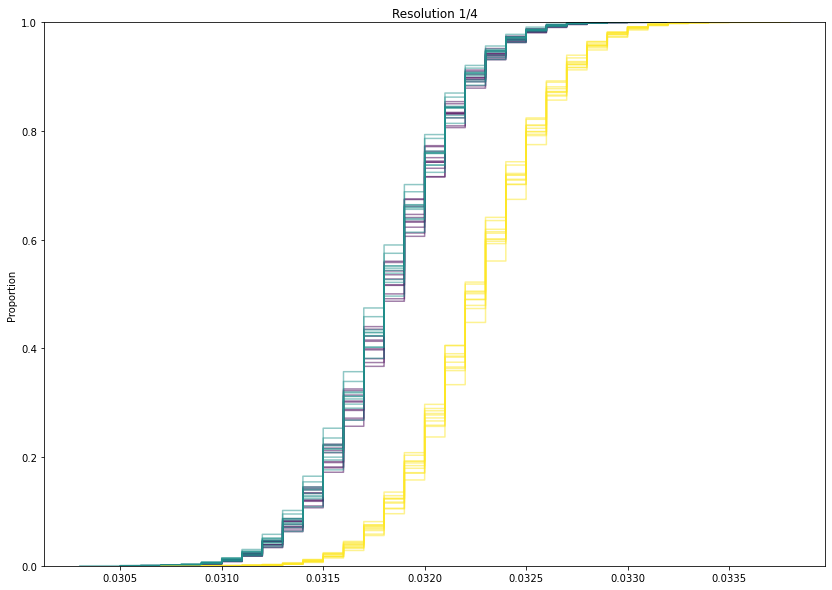

In [46]:
plt.figure();
for i in range(1,11):
    fr = [float(x) for x in df.loc['droop',4,i]['FR']]
    sns.ecdfplot(fr,color=colors[0],alpha=0.5)  
     
for i in range(1,11):
    fr = [float(x) for x in df.loc['equal',4,i]['FR']]
    sns.ecdfplot(fr,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    fr = [float(x) for x in df.loc['continuous',8,i]['FR']]
    sns.ecdfplot(fr,color=colors[2],alpha=0.5)
    
plt.title('Resolution 1/4');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_fr_1_4.pdf')

No clear difference.

In [78]:
r01 = norm_tests_fr(df.loc['droop',res[1]]['FR'])
print(f'{r01} tests failed')
r02 = norm_tests_fr(df.loc['equal',res[1]]['FR'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


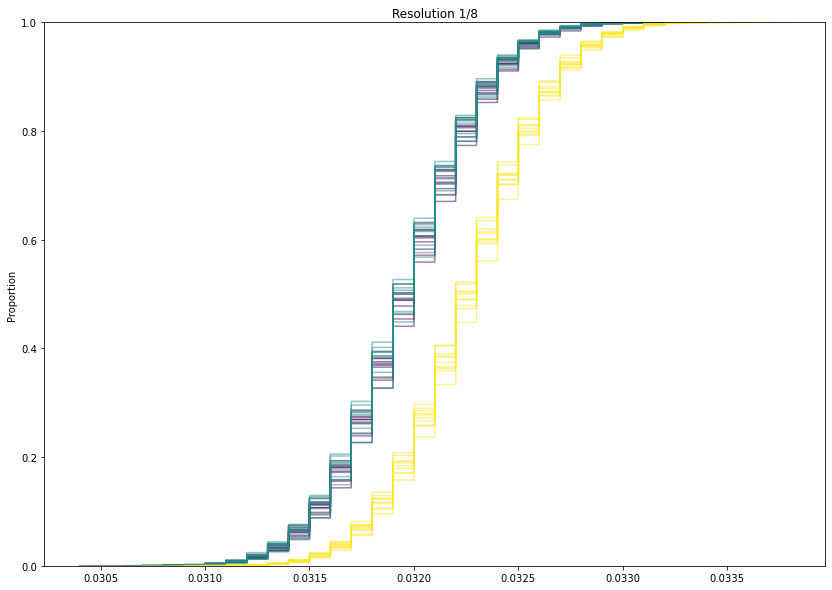

In [47]:
plt.figure();
for i in range(1,11):
    fr = [float(x) for x in df.loc['droop',8,i]['FR']]
    sns.ecdfplot(fr,color=colors[0],alpha=0.5)  
     
for i in range(1,11):
    fr = [float(x) for x in df.loc['equal',8,i]['FR']]
    sns.ecdfplot(fr,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    fr = [float(x) for x in df.loc['continuous',8,i]['FR']]
    sns.ecdfplot(fr,color=colors[2],alpha=0.5)
    
plt.title('Resolution 1/8');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_fr_1_8.pdf')

No clear difference between the models.

In [79]:
r01 = norm_tests_fr(df.loc['droop',res[2]]['FR'])
print(f'{r01} tests failed')
r02 = norm_tests_fr(df.loc['equal',res[2]]['FR'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


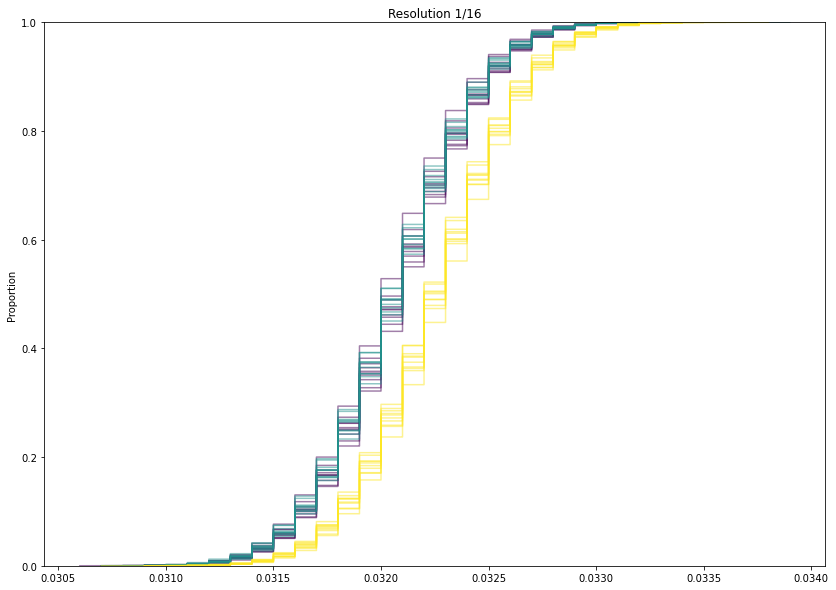

In [48]:
plt.figure();
for i in range(1,11):
    fr = [float(x) for x in df.loc['droop',16,i]['FR']]
    sns.ecdfplot(fr,color=colors[0],alpha=0.5)  
     
for i in range(1,11):
    fr = [float(x) for x in df.loc['equal',16,i]['FR']]
    sns.ecdfplot(fr,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    fr = [float(x) for x in df.loc['continuous',8,i]['FR']]
    sns.ecdfplot(fr,color=colors[2],alpha=0.5)
    
plt.title('Resolution 1/16');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_fr_1_16.pdf')

Again, no clear difference.

In [80]:
r01 = norm_tests_fr(df.loc['droop',res[3]]['FR'])
print(f'{r01} tests failed')
r02 = norm_tests_fr(df.loc['equal',res[3]]['FR'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


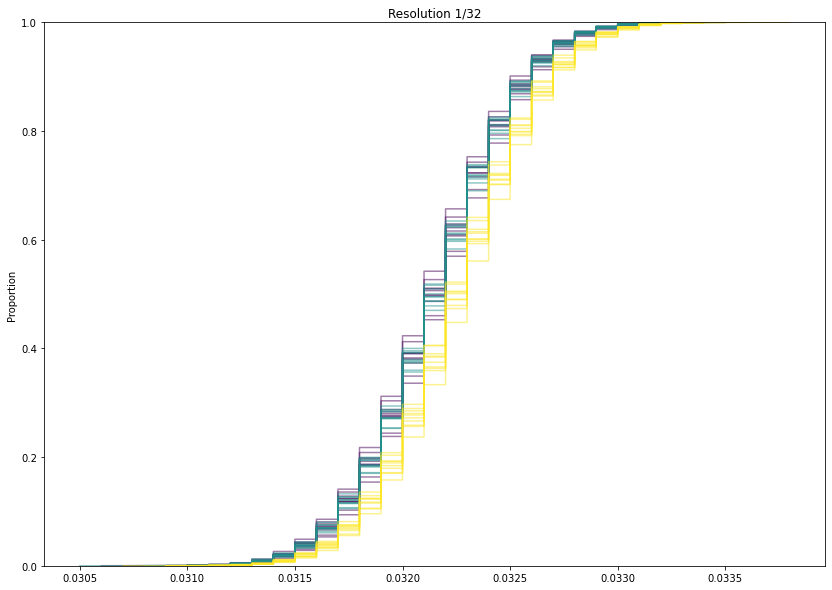

In [49]:
plt.figure();
for i in range(1,11):
    fr = [float(x) for x in df.loc['droop',32,i]['FR']]
    sns.ecdfplot(fr,color=colors[0],alpha=0.5)  
     
for i in range(1,11):
    fr = [float(x) for x in df.loc['equal',32,i]['FR']]
    sns.ecdfplot(fr,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    fr = [float(x) for x in df.loc['continuous',8,i]['FR']]
    sns.ecdfplot(fr,color=colors[2],alpha=0.5)
    
plt.title('Resolution 1/32');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_fr_1_32.pdf')

In [81]:
r01 = norm_tests_fr(df.loc['droop',res[4]]['FR'])
print(f'{r01} tests failed')
r02 = norm_tests_fr(df.loc['equal',res[4]]['FR'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


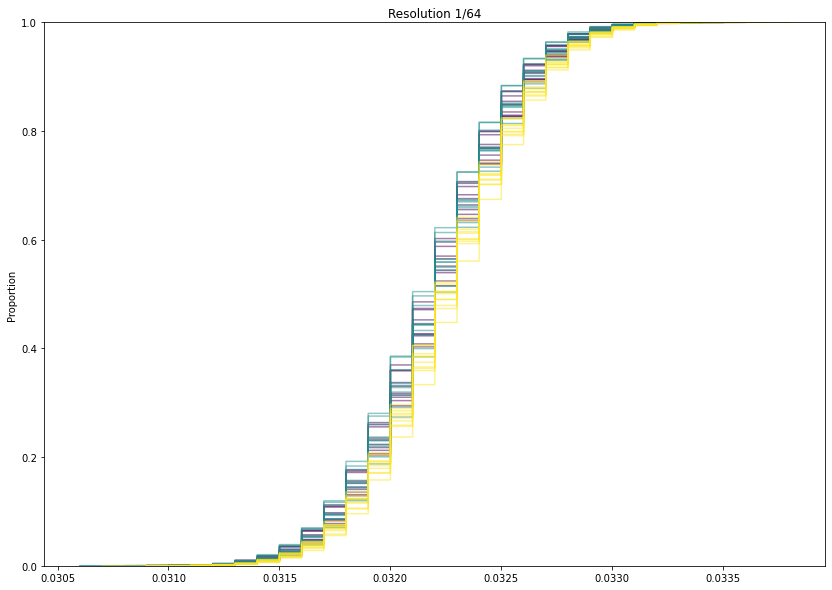

In [50]:
plt.figure();
for i in range(1,11):
    fr = [float(x) for x in df.loc['droop',64,i]['FR']]
    sns.ecdfplot(fr,color=colors[0],alpha=0.5)  
     
for i in range(1,11):
    fr = [float(x) for x in df.loc['equal',64,i]['FR']]
    sns.ecdfplot(fr,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    fr = [float(x) for x in df.loc['continuous',8,i]['FR']]
    sns.ecdfplot(fr,color=colors[2],alpha=0.5)
    
plt.title('Resolution 1/64');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_fr_1_64.pdf')

In [82]:
r01 = norm_tests_fr(df.loc['droop',res[5]]['FR'])
print(f'{r01} tests failed')
r02 = norm_tests_fr(df.loc['equal',res[5]]['FR'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


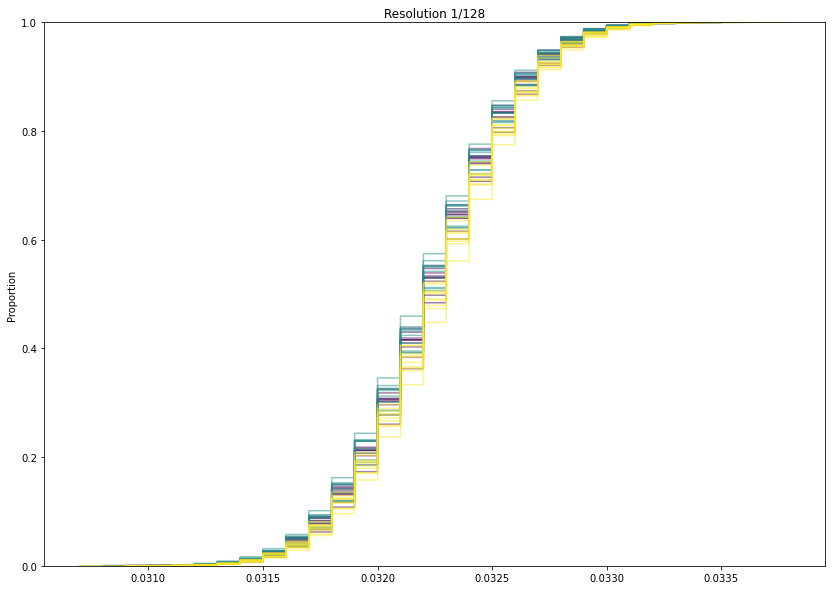

In [51]:
plt.figure();
for i in range(1,11):
    fr = [float(x) for x in df.loc['droop',128,i]['FR']]
    sns.ecdfplot(fr,color=colors[0],alpha=0.5)  
     
for i in range(1,11):
    fr = [float(x) for x in df.loc['equal',128,i]['FR']]
    sns.ecdfplot(fr,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    fr = [float(x) for x in df.loc['continuous',8,i]['FR']]
    sns.ecdfplot(fr,color=colors[2],alpha=0.5)
    
plt.title('Resolution 1/128');
plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_fr_1_128.pdf')

In [83]:
r01 = norm_tests_fr(df.loc['droop',res[6]]['FR'])
print(f'{r01} tests failed')
r02 = norm_tests_fr(df.loc['equal',res[6]]['FR'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


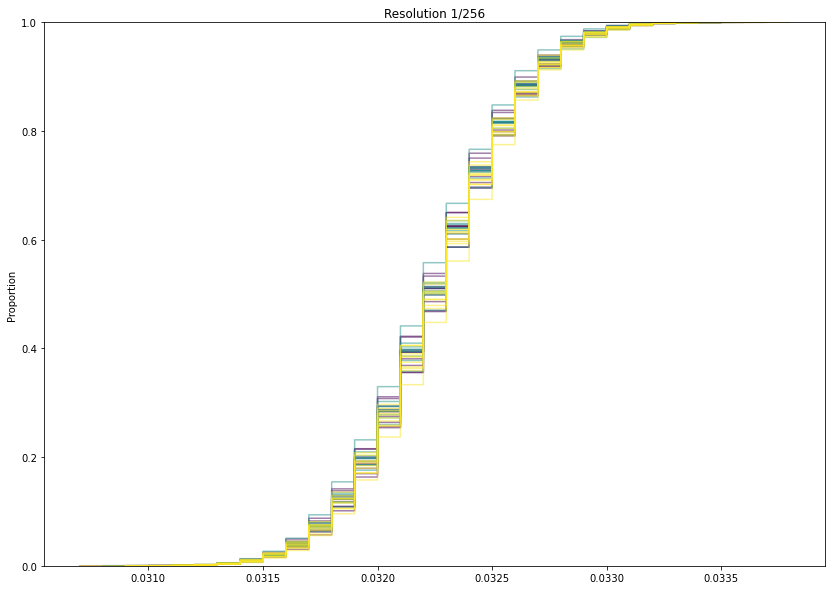

In [55]:
plt.figure();
for i in range(1,11):
    fr = [float(x) for x in df.loc['droop',256,i]['FR']]
    sns.ecdfplot(fr,color=colors[0],alpha=0.5)  
     
for i in range(1,11):
    fr = [float(x) for x in df.loc['equal',256,i]['FR']]
    sns.ecdfplot(fr,color=colors[1],alpha=0.5)
    
# plot the true values
for i in range(1,11):
    fr = [float(x) for x in df.loc['continuous',8,i]['FR']]
    sns.ecdfplot(fr,color=colors[2],alpha=0.5)
    
plt.title('Resolution 1/256');
#plt.savefig('C:\\Users\\Nida\\Documents\\NMBU\\master\\Figures\\Brunel\\brunel_fr_1_256.pdf')

In [84]:
r01 = norm_tests_fr(df.loc['droop',res[7]]['FR'])
print(f'{r01} tests failed')
r02 = norm_tests_fr(df.loc['equal',res[7]]['FR'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


All normal tests passed. 

Based on the FR distributions it can not be said whether the models are different. They have very similar curves for all the resolutions. And again, for higher resolutions they get closer to the true model.

# CC

We look at the distributions of the CC values. We calculated them using different binsizes in the BinnedSpikeTrain function needed to calculate the values. Lets start with the 5ms binsize version.
## 5ms binsize

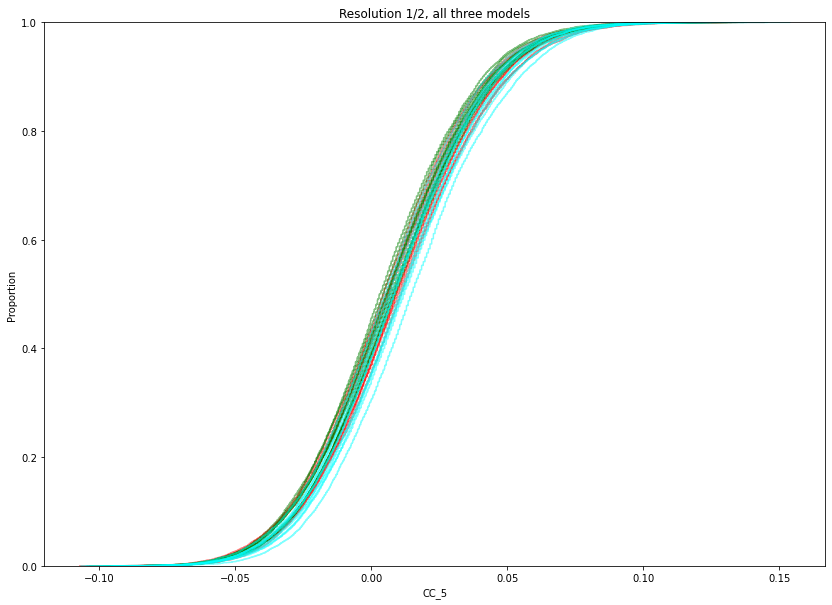

In [22]:
for i in range(1,11):
    cc = df.loc['droop',res[0],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[0],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/2, all three models');

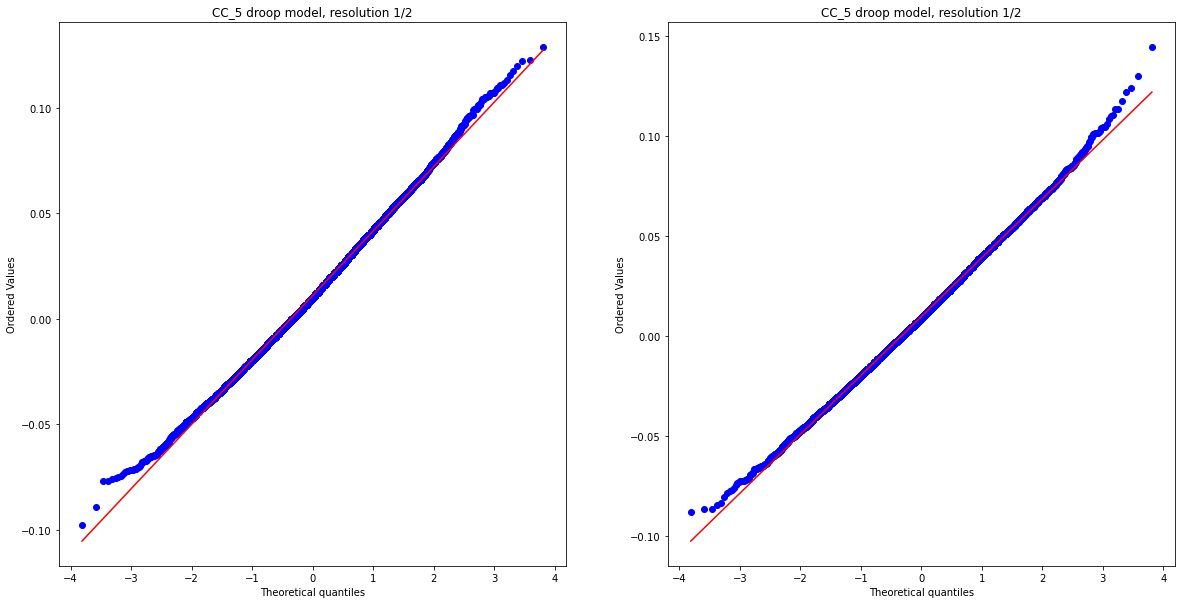

In [87]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['droop',res[0],9]['CC_5']
probplot(list(cv1.values),plot=plt);
plt.title('CC_5 droop model, resolution 1/2');
ax2 = plt.subplot(122)
cv2 = df.loc['droop',res[0],10]['CC_5']
probplot(list(cv2.values),plot=plt);
plt.title('CC_5 droop model, resolution 1/2');

plt.show();

In [86]:
r01 = norm_tests(df.loc['droop',res[0]]['CC_5'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[0]]['CC_5'])
print(f'{r02} tests failed')

10 tests failed
10 tests failed


Dont really see a clear difference between the three models CC distributon, lets try to zoom in.

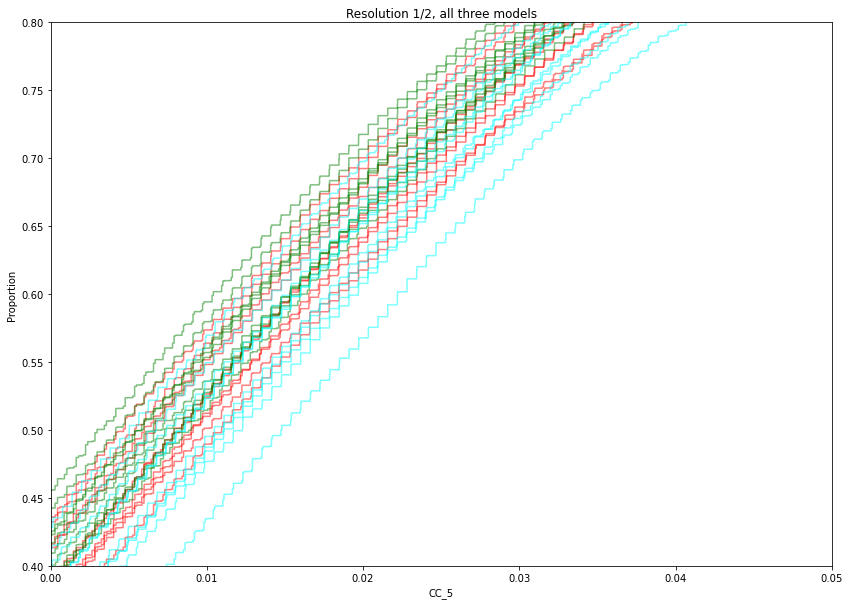

In [24]:
for i in range(1,11):
    cc = df.loc['droop',res[0],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[0],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/2, all three models');
plt.xlim(0,0.05);
plt.ylim(0.4,0.8);

Maybe droop (red) model slightly closer to true model if looking at collection of all seeds. But no clear distinction.

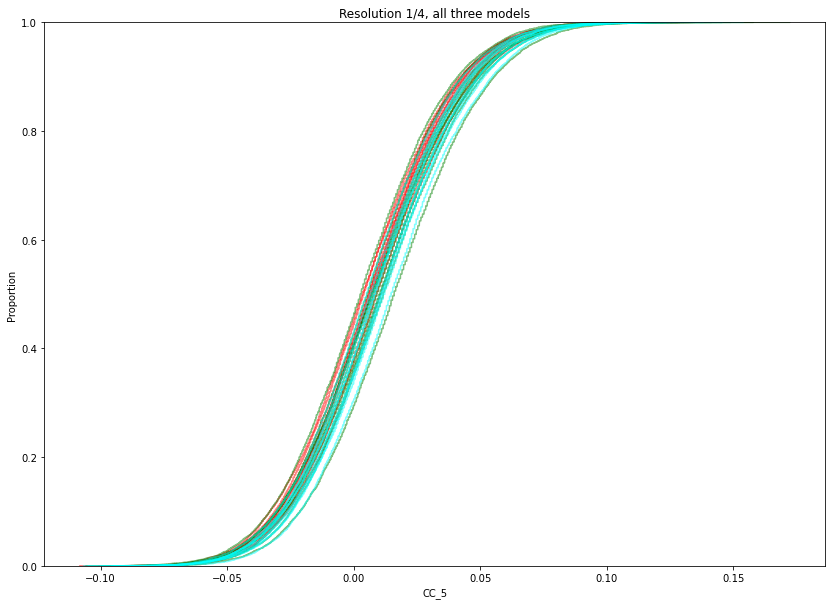

In [25]:
for i in range(1,11):
    cc = df.loc['droop',res[1],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[1],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/4, all three models');

Zoom in

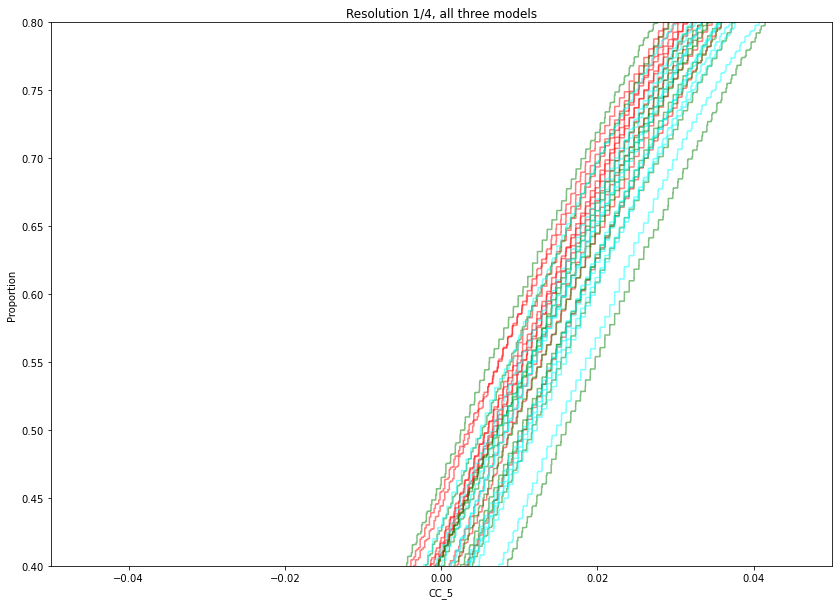

In [26]:
for i in range(1,11):
    cc = df.loc['droop',res[1],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[1],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/4, all three models');
plt.xlim(-0.05,0.05);
plt.ylim(0.4,0.8);

Even less clear if the models are different. 

In [88]:
r01 = norm_tests(df.loc['droop',res[1]]['CC_5'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[1]]['CC_5'])
print(f'{r02} tests failed')

9 tests failed
10 tests failed


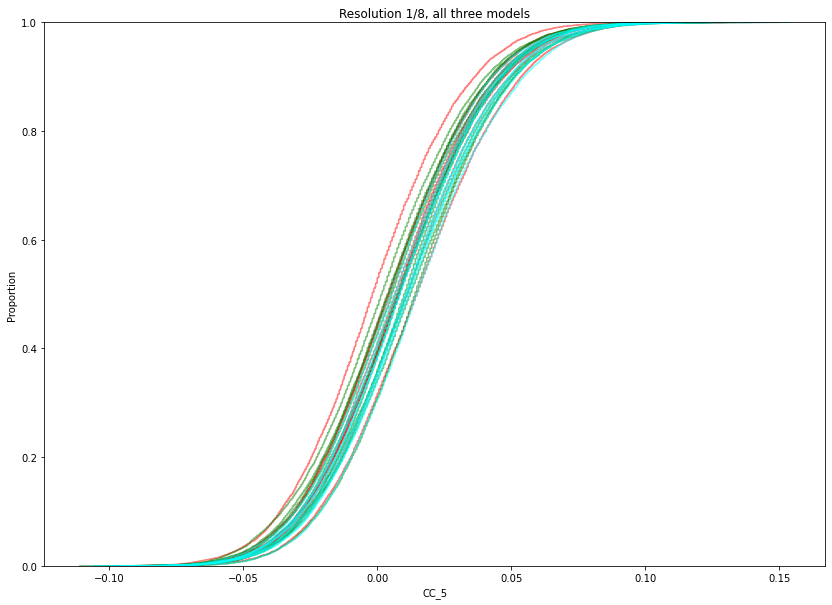

In [27]:
for i in range(1,11):
    cc = df.loc['droop',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/8, all three models');

Zoom in.

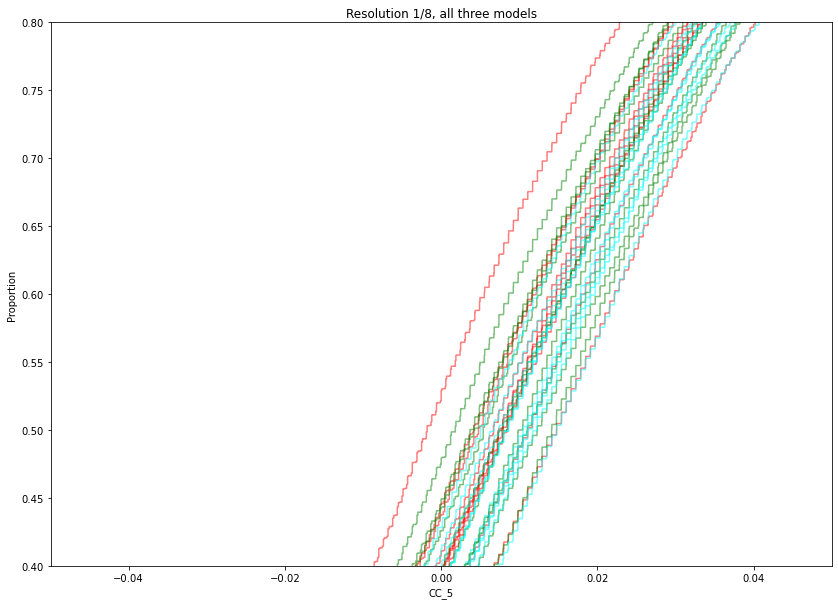

In [28]:
for i in range(1,11):
    cc = df.loc['droop',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/8, all three models');
plt.xlim(-0.05,0.05);
plt.ylim(0.4,0.8);

Maybe equal (green) model more similar to true model, see at least the seed furthest away for equal model is closer than seed furthest away for droop model.

In [89]:
r01 = norm_tests(df.loc['droop',res[2]]['CC_5'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[2]]['CC_5'])
print(f'{r02} tests failed')

10 tests failed
9 tests failed


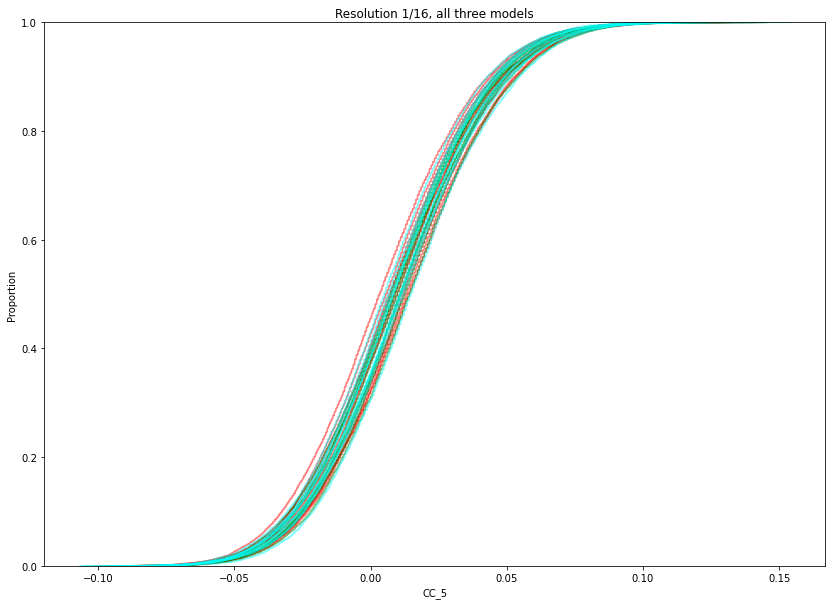

In [29]:
for i in range(1,11):
    cc = df.loc['droop',res[3],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[3],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/16, all three models');

Seems very similar, zoom in.

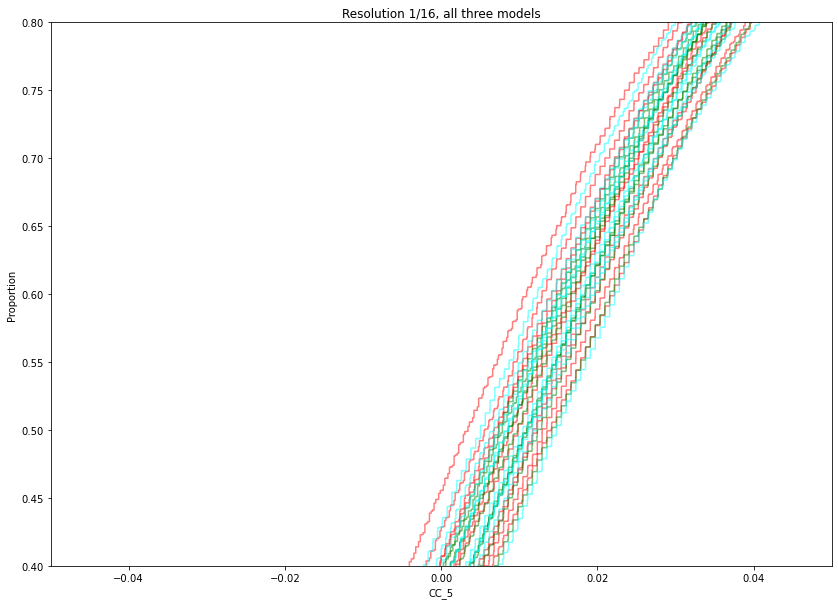

In [30]:
for i in range(1,11):
    cc = df.loc['droop',res[3],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[3],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/16, all three models');
plt.xlim(-0.05,0.05);
plt.ylim(0.4,0.8);

Again, not clear

In [90]:
r01 = norm_tests(df.loc['droop',res[3]]['CC_5'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[3]]['CC_5'])
print(f'{r02} tests failed')

9 tests failed
9 tests failed


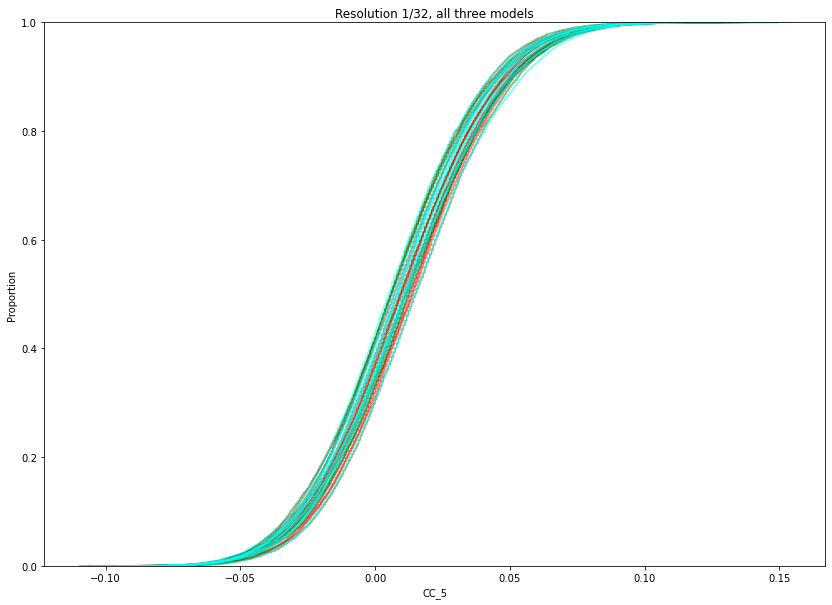

In [31]:
for i in range(1,11):
    cc = df.loc['droop',res[4],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[4],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/32, all three models');

In [91]:
r01 = norm_tests(df.loc['droop',res[4]]['CC_5'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[4]]['CC_5'])
print(f'{r02} tests failed')

10 tests failed
10 tests failed


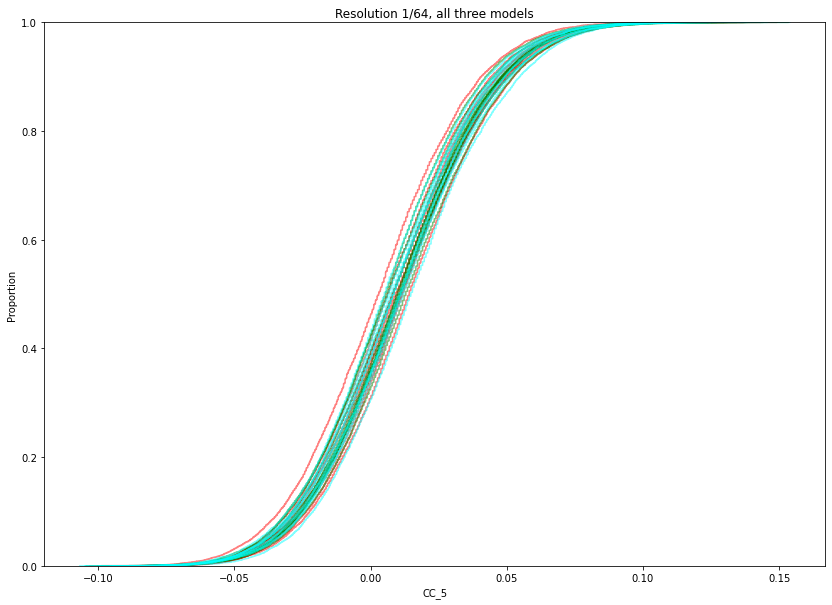

In [32]:
for i in range(1,11):
    cc = df.loc['droop',res[5],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[5],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/64, all three models');

In [92]:
r01 = norm_tests(df.loc['droop',res[5]]['CC_5'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[5]]['CC_5'])
print(f'{r02} tests failed')

10 tests failed
9 tests failed


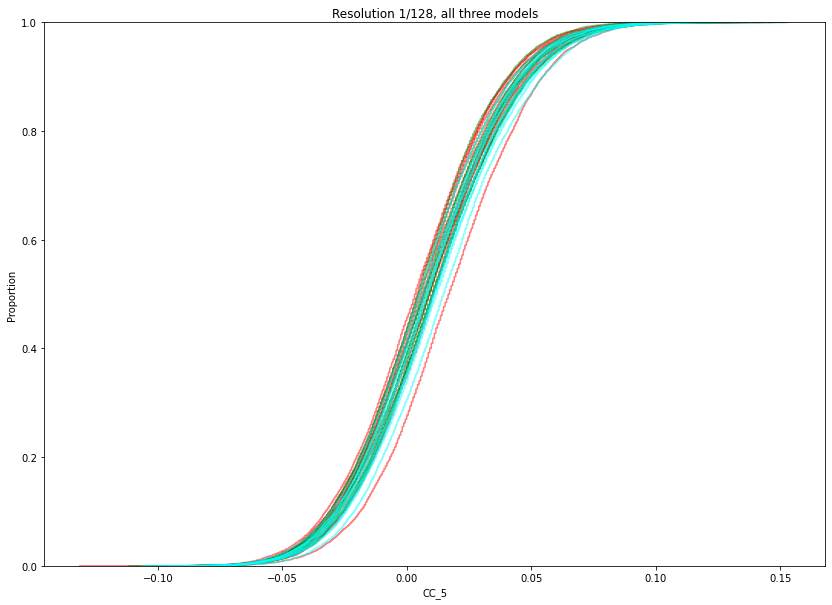

In [33]:
for i in range(1,11):
    cc = df.loc['droop',res[6],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[6],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/128, all three models');

In [93]:
r01 = norm_tests(df.loc['droop',res[6]]['CC_5'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[6]]['CC_5'])
print(f'{r02} tests failed')

8 tests failed
10 tests failed


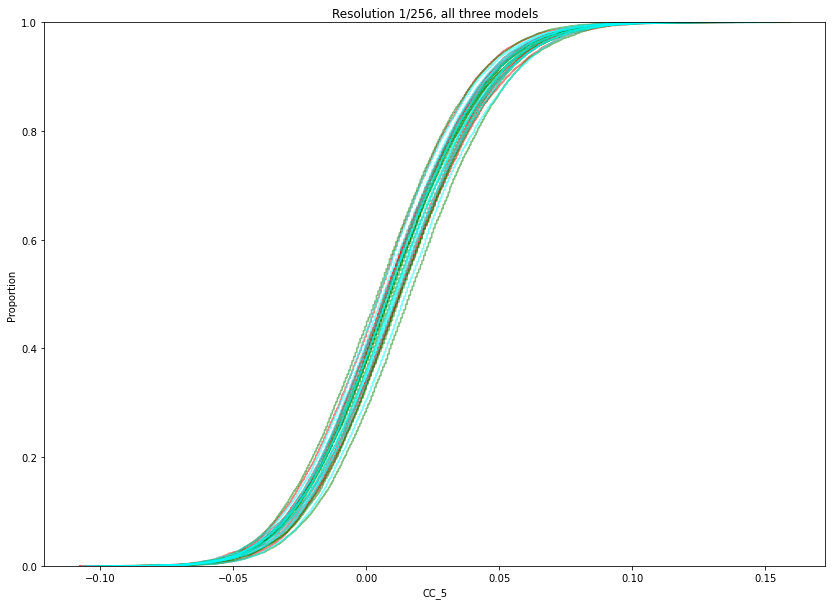

In [34]:
for i in range(1,11):
    cc = df.loc['droop',res[7],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[7],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/256, all three models');

Zoom in and see if there is a difference.

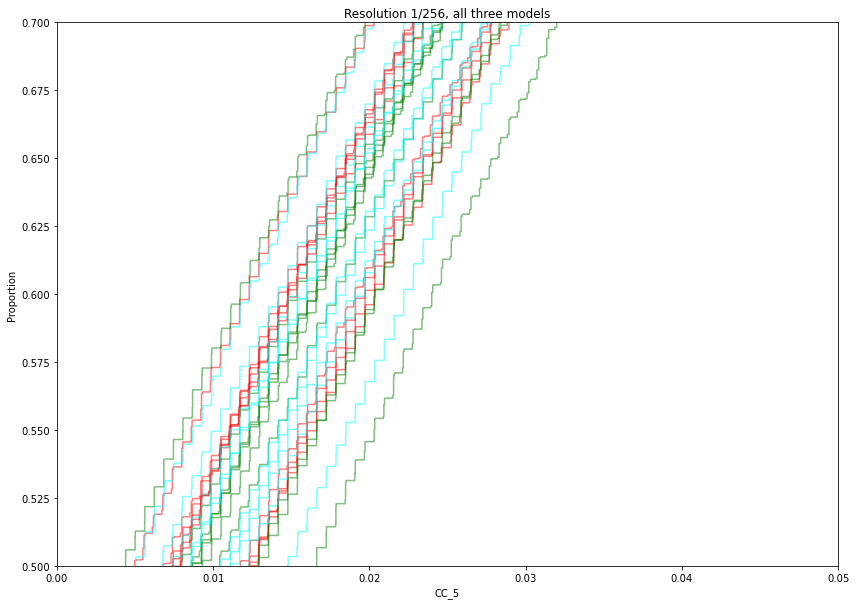

In [35]:
for i in range(1,11):
    cc = df.loc['droop',res[7],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[7],i]['CC_5']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/256, all three models');
plt.xlim(0.00,0.05);
plt.ylim(0.5,0.7);

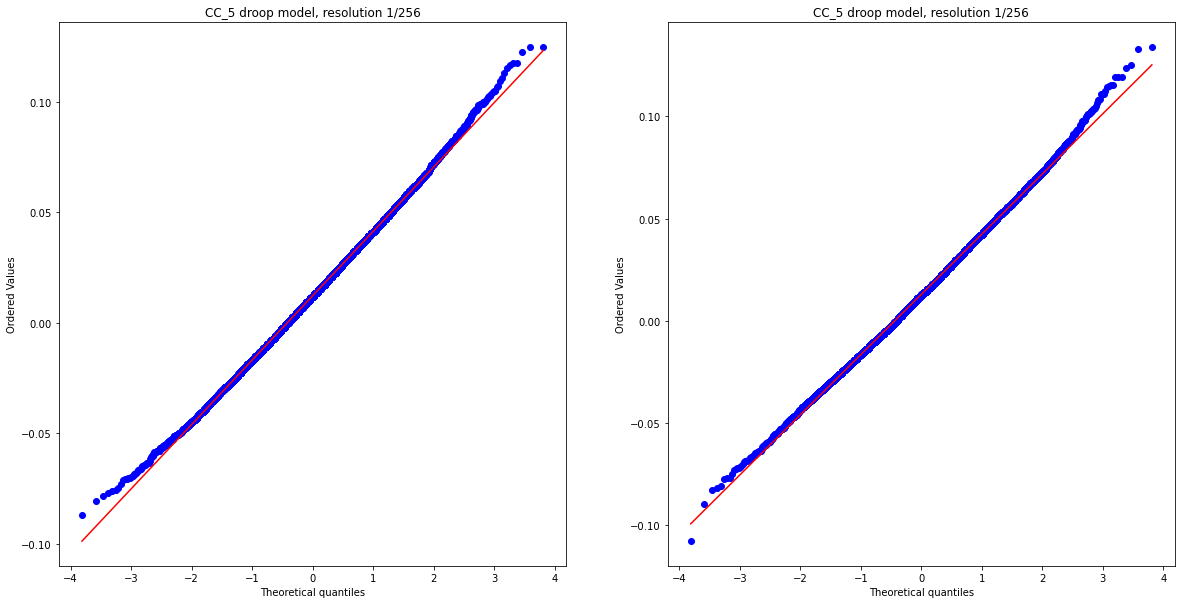

In [96]:
plt.figure(figsize=(20,10));

ax1 = plt.subplot(121)
cv1 = df.loc['droop',res[7],9]['CC_5']
probplot(list(cv1.values),plot=plt);
plt.title('CC_5 droop model, resolution 1/256');
ax2 = plt.subplot(122)
cv2 = df.loc['droop',res[7],10]['CC_5']
probplot(list(cv2.values),plot=plt);
plt.title('CC_5 droop model, resolution 1/256');

plt.show();

In [94]:
r01 = norm_tests(df.loc['droop',res[7]]['CC_5'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[7]]['CC_5'])
print(f'{r02} tests failed')

10 tests failed
10 tests failed


So far, there was no clear difference between the three models. The CC distributions seem to be very similar. Lets see if bin size in calculations of the CC values has something to do with this.

## 10ms binsize
Lets try the 10 ms bin size CC values.

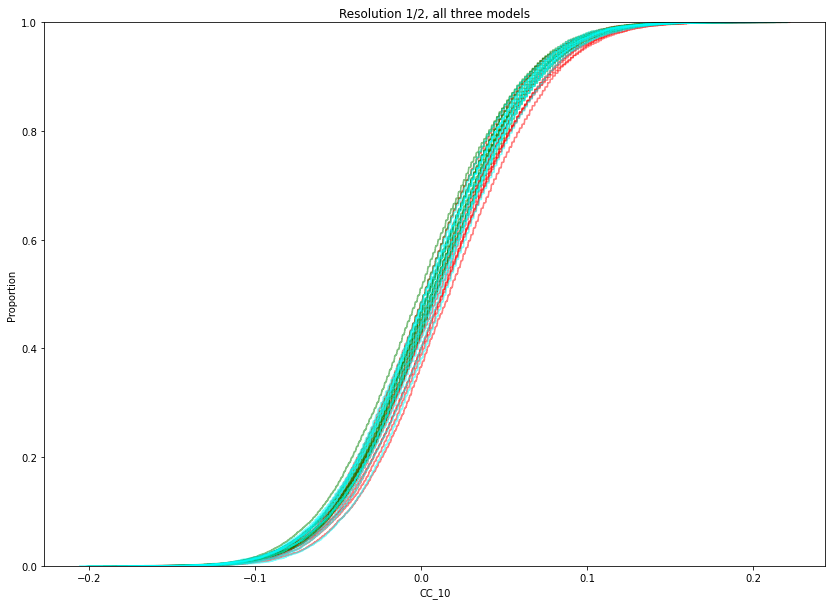

In [36]:
for i in range(1,11):
    cc = df.loc['droop',res[0],i]['CC_10']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[0],i]['CC_10']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/2, all three models');

In [97]:
r01 = norm_tests(df.loc['droop',res[0]]['CC_10'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[0]]['CC_10'])
print(f'{r02} tests failed')

0 tests failed
2 tests failed


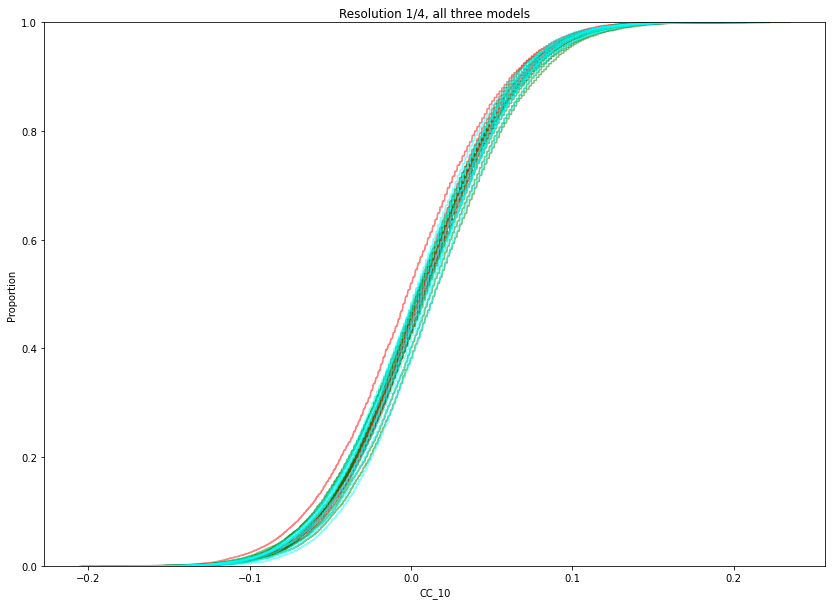

In [37]:
for i in range(1,11):
    cc = df.loc['droop',res[1],i]['CC_10']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[1],i]['CC_10']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/4, all three models');

In [98]:
r01 = norm_tests(df.loc['droop',res[1]]['CC_10'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[1]]['CC_10'])
print(f'{r02} tests failed')

0 tests failed
2 tests failed


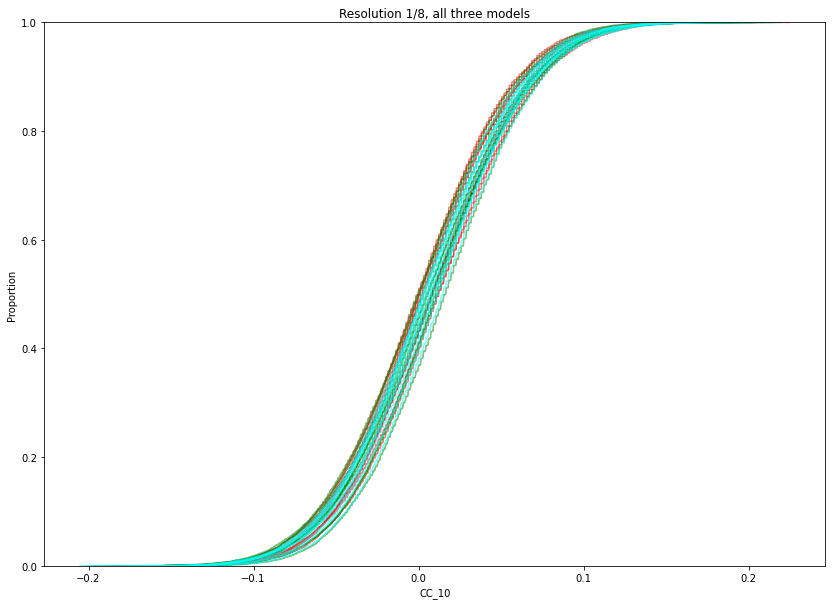

In [38]:
for i in range(1,11):
    cc = df.loc['droop',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/8, all three models');

In [99]:
r01 = norm_tests(df.loc['droop',res[2]]['CC_10'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[2]]['CC_10'])
print(f'{r02} tests failed')

3 tests failed
2 tests failed


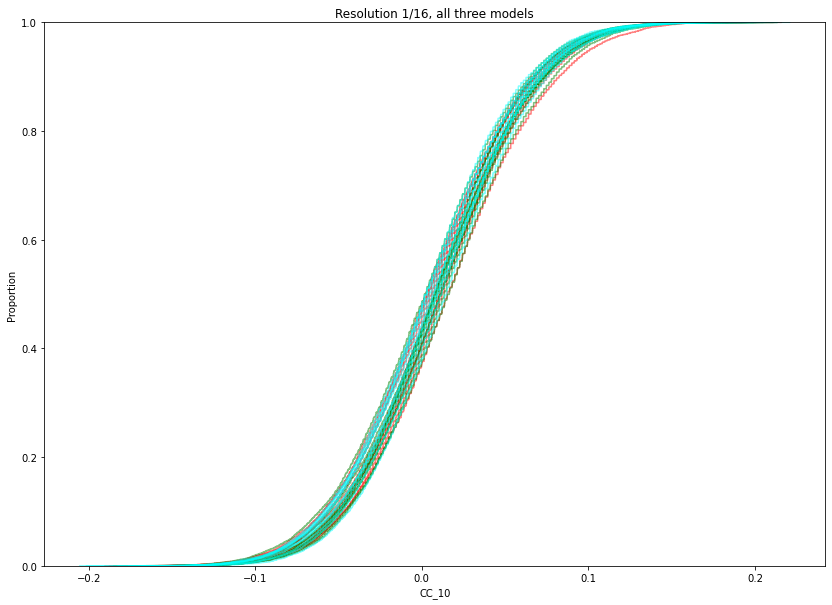

In [39]:
for i in range(1,11):
    cc = df.loc['droop',res[3],i]['CC_10']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[3],i]['CC_10']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/16, all three models');

In [100]:
r01 = norm_tests(df.loc['droop',res[3]]['CC_10'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[3]]['CC_10'])
print(f'{r02} tests failed')

2 tests failed
0 tests failed


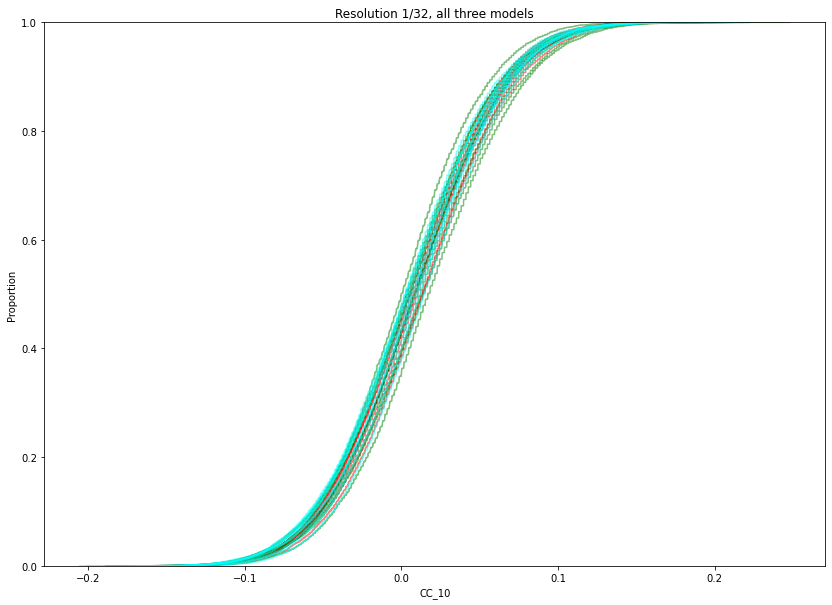

In [40]:
for i in range(1,11):
    cc = df.loc['droop',res[4],i]['CC_10']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[4],i]['CC_10']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/32, all three models');

In [101]:
r01 = norm_tests(df.loc['droop',res[4]]['CC_10'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[4]]['CC_10'])
print(f'{r02} tests failed')

2 tests failed
2 tests failed


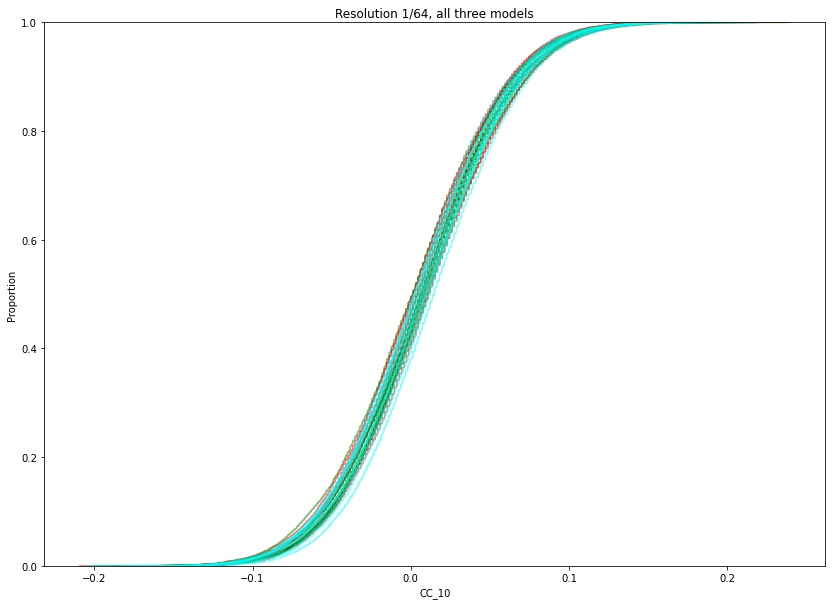

In [41]:
for i in range(1,11):
    cc = df.loc['droop',res[5],i]['CC_10']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[5],i]['CC_10']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/64, all three models');

In [102]:
r01 = norm_tests(df.loc['droop',res[5]]['CC_10'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[5]]['CC_10'])
print(f'{r02} tests failed')

1 tests failed
0 tests failed


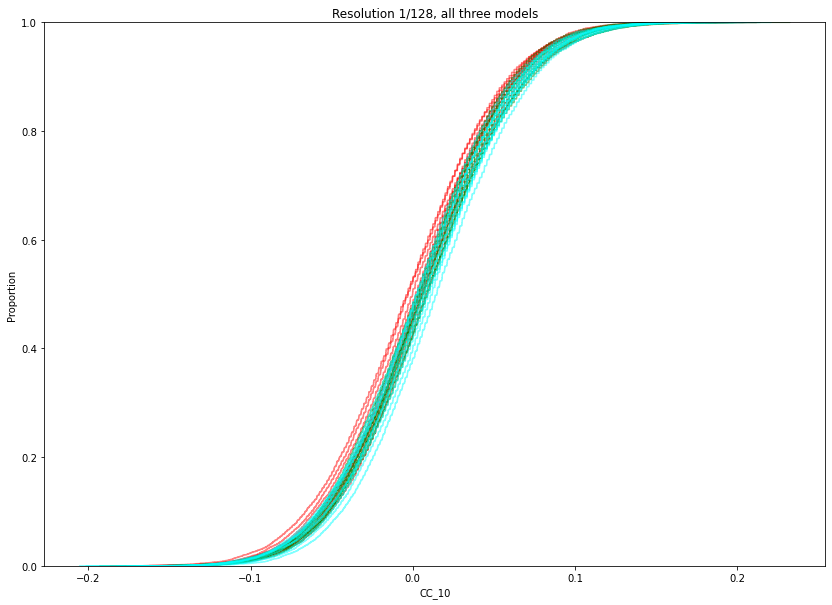

In [42]:
for i in range(1,11):
    cc = df.loc['droop',res[6],i]['CC_10']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[6],i]['CC_10']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/128, all three models');

Seems like a little difference here, zoom in.

In [103]:
r01 = norm_tests(df.loc['droop',res[6]]['CC_10'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[6]]['CC_10'])
print(f'{r02} tests failed')

1 tests failed
4 tests failed


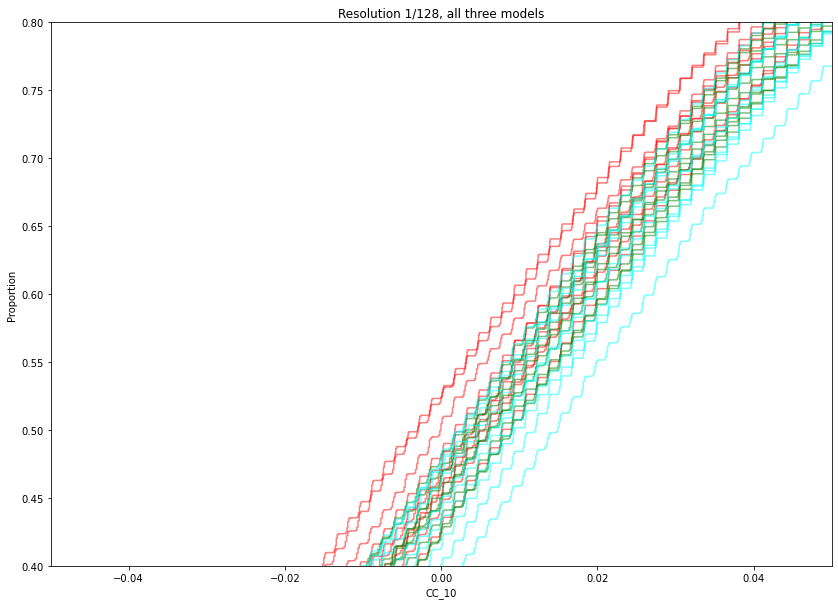

In [43]:
for i in range(1,11):
    cc = df.loc['droop',res[6],i]['CC_10']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[6],i]['CC_10']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/128, all three models');
plt.xlim(-0.05,0.05);
plt.ylim(0.4,0.8);

Here the equal (green) model seems a little closer to the true model.But not superclear.

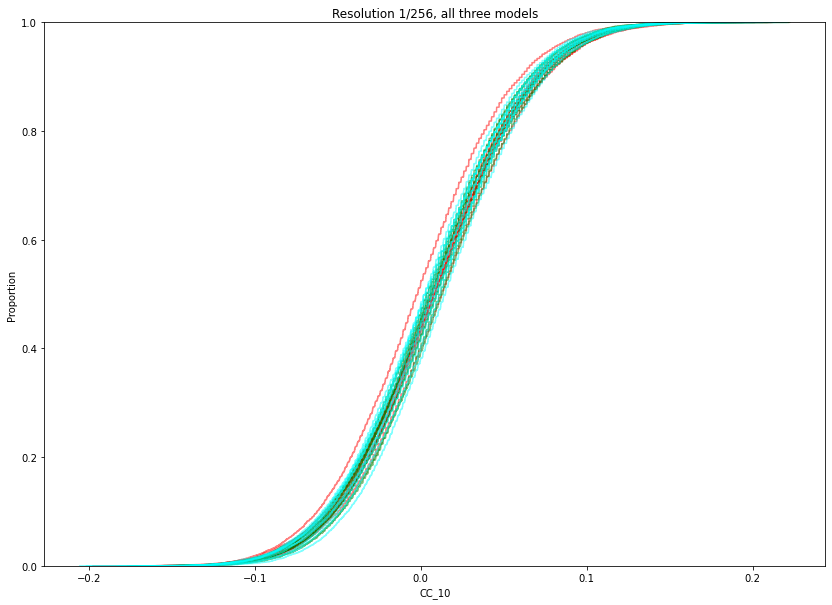

In [44]:
for i in range(1,11):
    cc = df.loc['droop',res[7],i]['CC_10']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[7],i]['CC_10']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/256, all three models');

Zoom

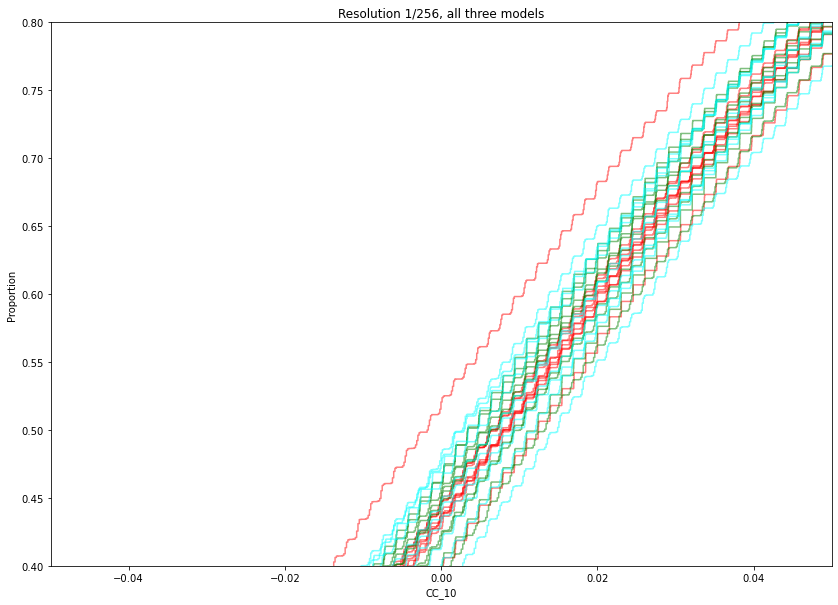

In [45]:
for i in range(1,11):
    cc = df.loc['droop',res[7],i]['CC_10']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[7],i]['CC_10']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_10']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/256, all three models');
plt.xlim(-0.05,0.05);
plt.ylim(0.4,0.8);

Again, the equal model seems slightly closer to the true model.

In [104]:
r01 = norm_tests(df.loc['droop',res[7]]['CC_10'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[7]]['CC_10'])
print(f'{r02} tests failed')

5 tests failed
3 tests failed


In most of the plots there were noe real difference between the models. For the higher resolutions it seemed like maybe the equal model was closer to the true model. But not sure if there is a big enough difference for us to conclude which models are more or less similar. Would say this does not yet give proof of differences between the models.

## 20ms binsize
Lets look at binsize 20 ms.

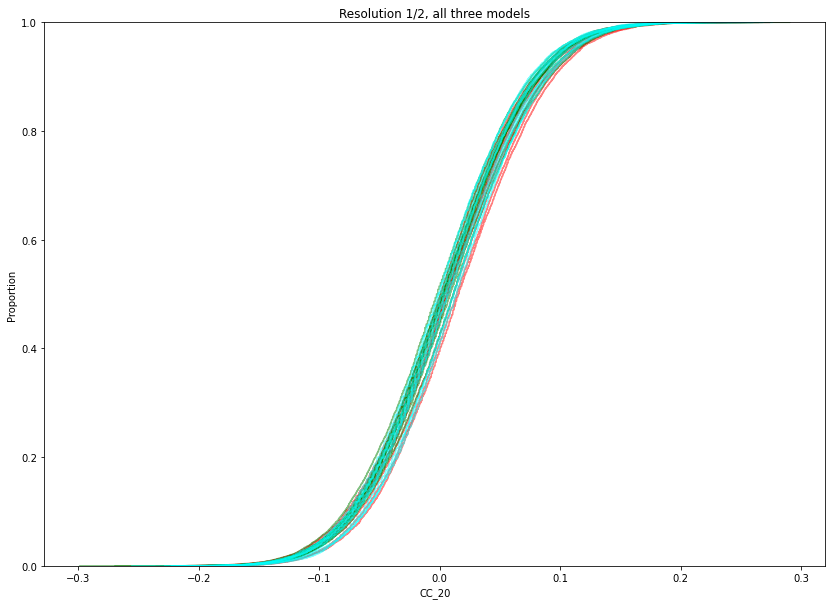

In [46]:
for i in range(1,11):
    cc = df.loc['droop',res[0],i]['CC_20']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[0],i]['CC_20']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/2, all three models');

In [105]:
r01 = norm_tests(df.loc['droop',res[0]]['CC_20'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[0]]['CC_20'])
print(f'{r02} tests failed')

0 tests failed
1 tests failed


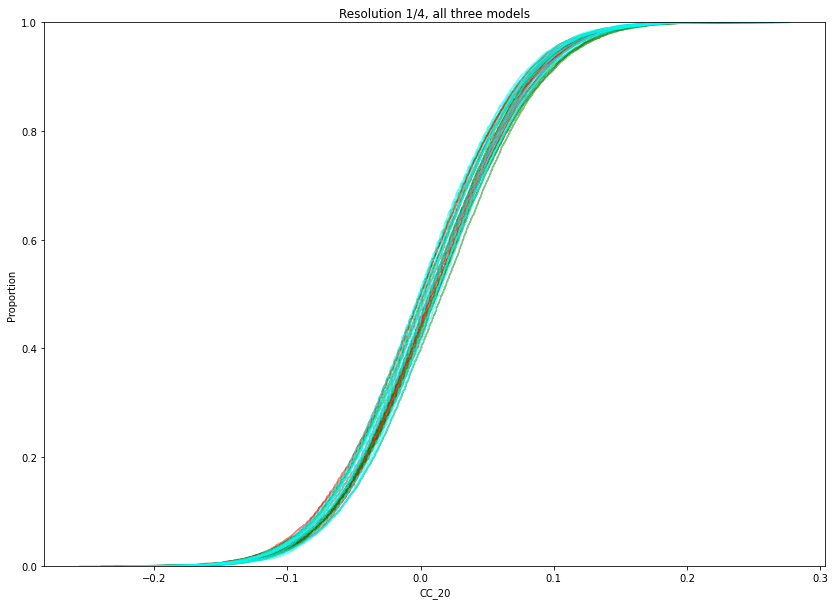

In [47]:
for i in range(1,11):
    cc = df.loc['droop',res[1],i]['CC_20']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[1],i]['CC_20']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/4, all three models');

In [106]:
r01 = norm_tests(df.loc['droop',res[1]]['CC_20'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[1]]['CC_20'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


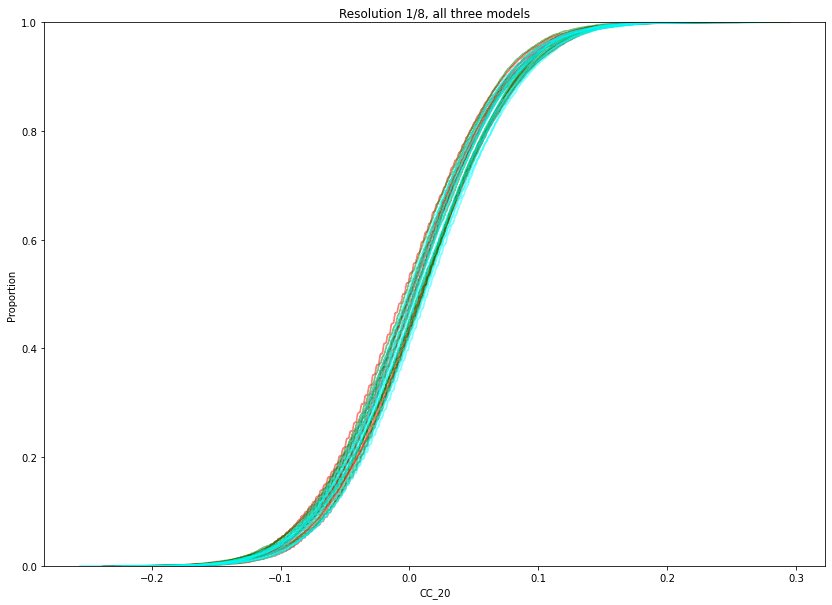

In [48]:
for i in range(1,11):
    cc = df.loc['droop',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/8, all three models');

In [108]:
r01 = norm_tests(df.loc['droop',res[2]]['CC_20'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[2]]['CC_20'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


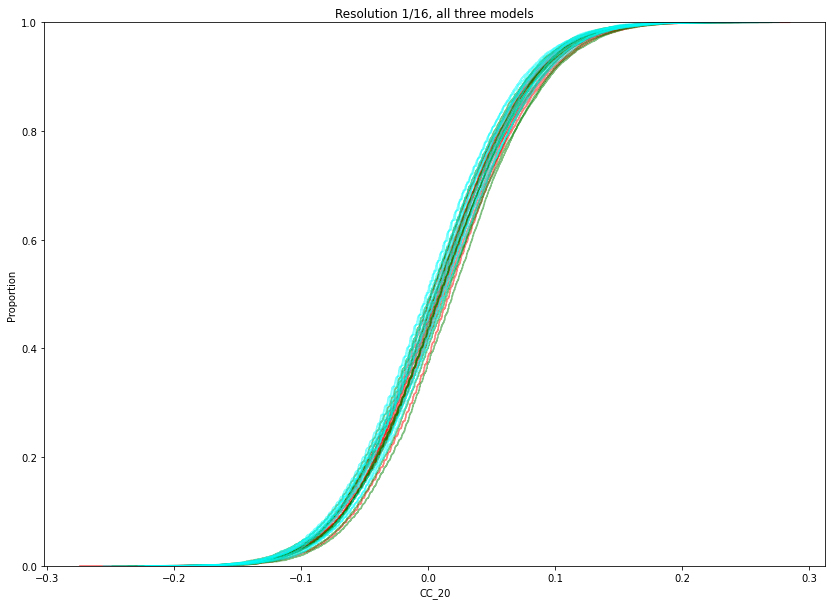

In [49]:
for i in range(1,11):
    cc = df.loc['droop',res[3],i]['CC_20']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[3],i]['CC_20']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/16, all three models');

In [109]:
r01 = norm_tests(df.loc['droop',res[3]]['CC_20'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[3]]['CC_20'])
print(f'{r02} tests failed')

1 tests failed
0 tests failed


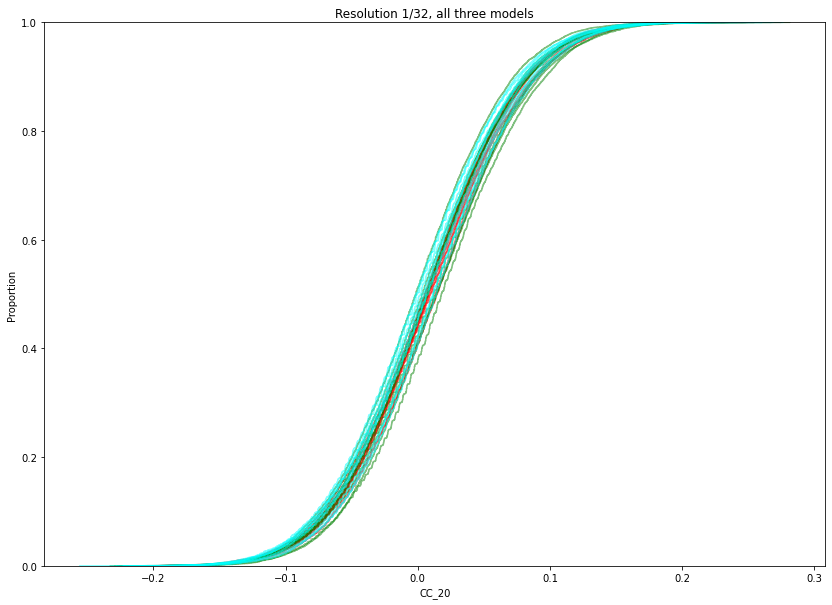

In [50]:
for i in range(1,11):
    cc = df.loc['droop',res[4],i]['CC_20']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[4],i]['CC_20']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/32, all three models');

In [110]:
r01 = norm_tests(df.loc['droop',res[4]]['CC_20'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[4]]['CC_20'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


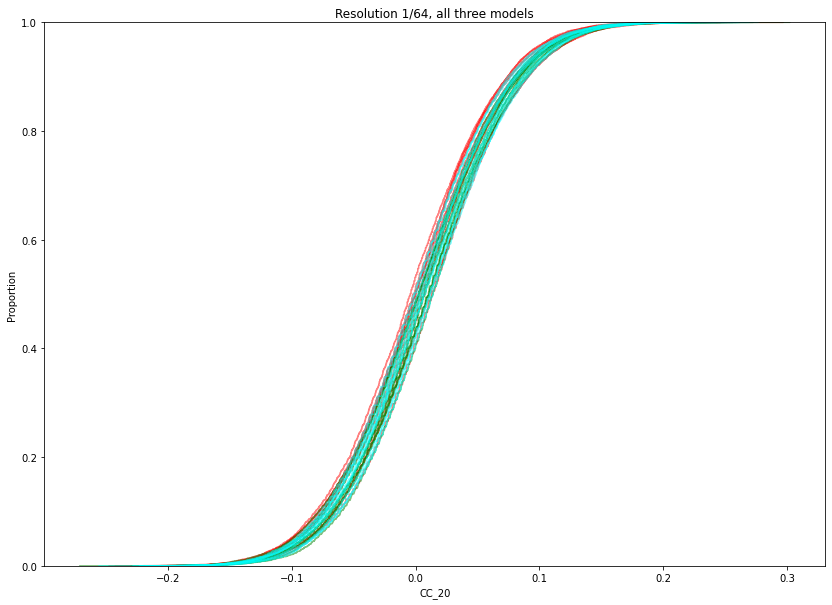

In [51]:
for i in range(1,11):
    cc = df.loc['droop',res[5],i]['CC_20']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[5],i]['CC_20']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/64, all three models');

In [111]:
r01 = norm_tests(df.loc['droop',res[5]]['CC_20'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[5]]['CC_20'])
print(f'{r02} tests failed')

0 tests failed
1 tests failed


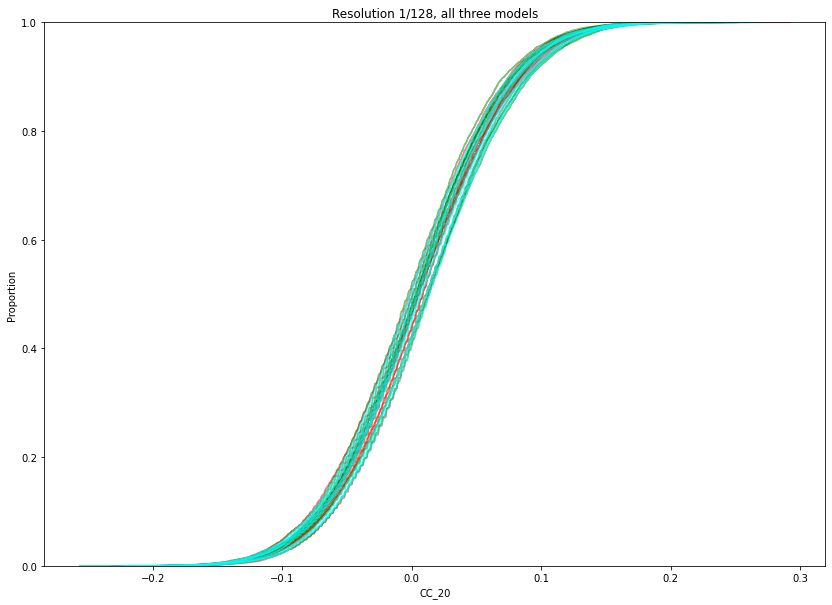

In [52]:
for i in range(1,11):
    cc = df.loc['droop',res[6],i]['CC_20']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[6],i]['CC_20']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/128, all three models');

In [112]:
r01 = norm_tests(df.loc['droop',res[6]]['CC_20'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[6]]['CC_20'])
print(f'{r02} tests failed')

1 tests failed
0 tests failed


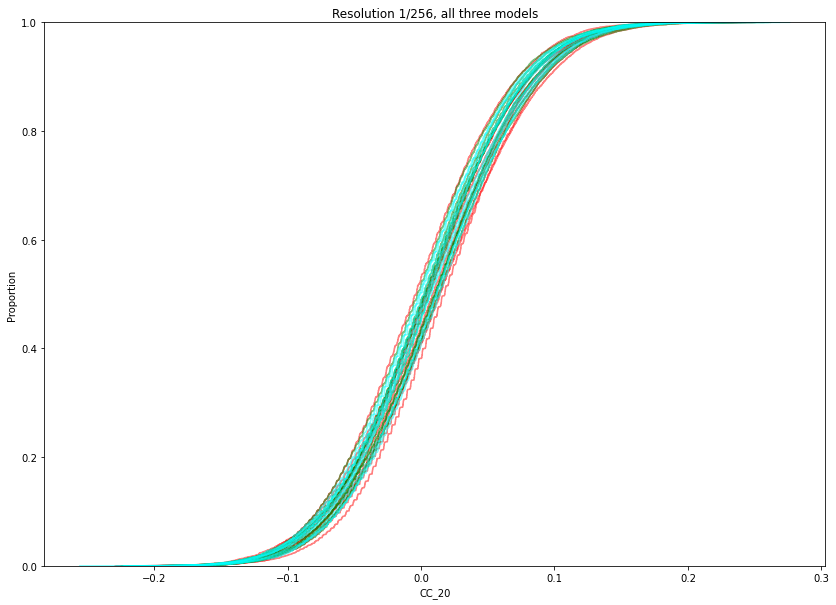

In [53]:
for i in range(1,11):
    cc = df.loc['droop',res[7],i]['CC_20']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[7],i]['CC_20']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/256, all three models');

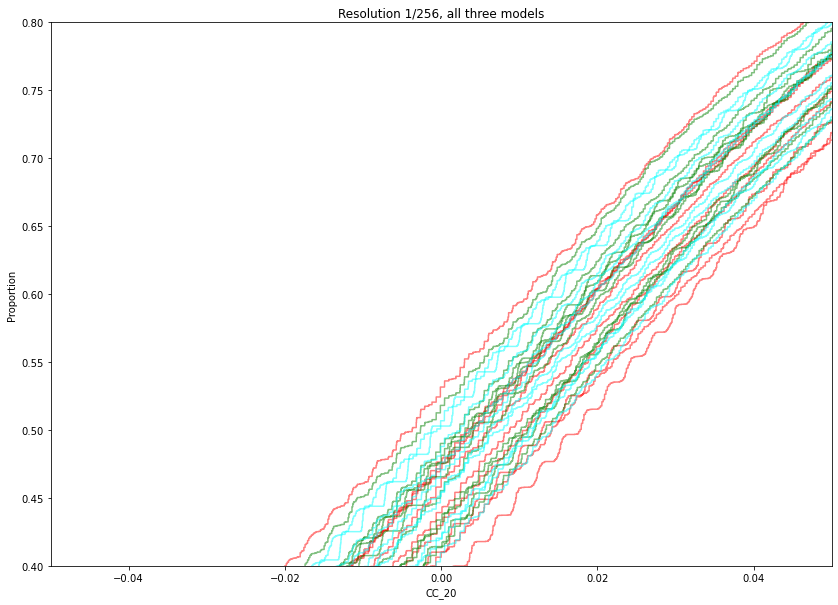

In [54]:
for i in range(1,11):
    cc = df.loc['droop',res[7],i]['CC_20']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[7],i]['CC_20']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_20']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/256, all three models');
plt.xlim(-0.05,0.05);
plt.ylim(0.4,0.8);

In [113]:
r01 = norm_tests(df.loc['droop',res[7]]['CC_20'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[7]]['CC_20'])
print(f'{r02} tests failed')

1 tests failed
1 tests failed


Did not really get the impression that there was a difference between the models in any of the cases. Did not even need to zoom in to see this. Maybe just that the equal model was slightly closer to true model, but no very clear difference. Lets see the last binsize value.

## 50ms binsize

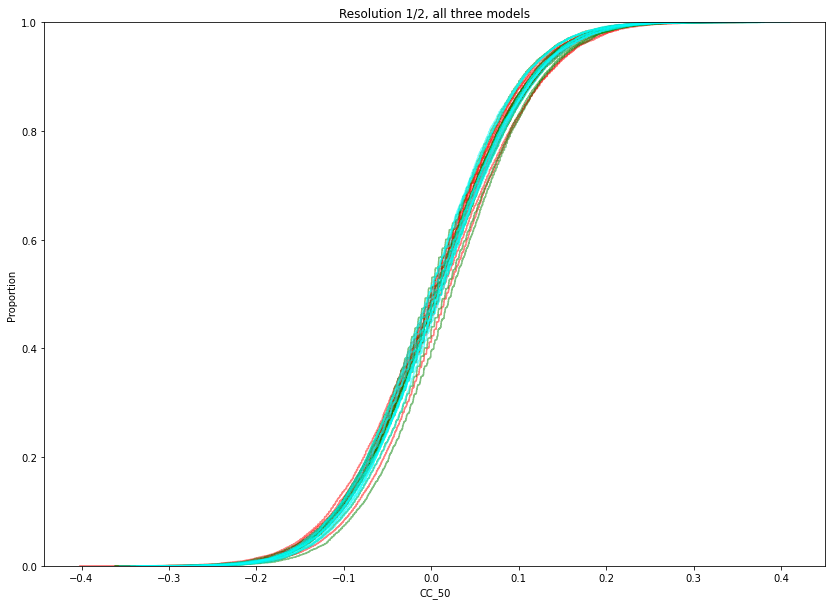

In [55]:
for i in range(1,11):
    cc = df.loc['droop',res[0],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[0],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/2, all three models');

In [114]:
r01 = norm_tests(df.loc['droop',res[0]]['CC_50'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[0]]['CC_50'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


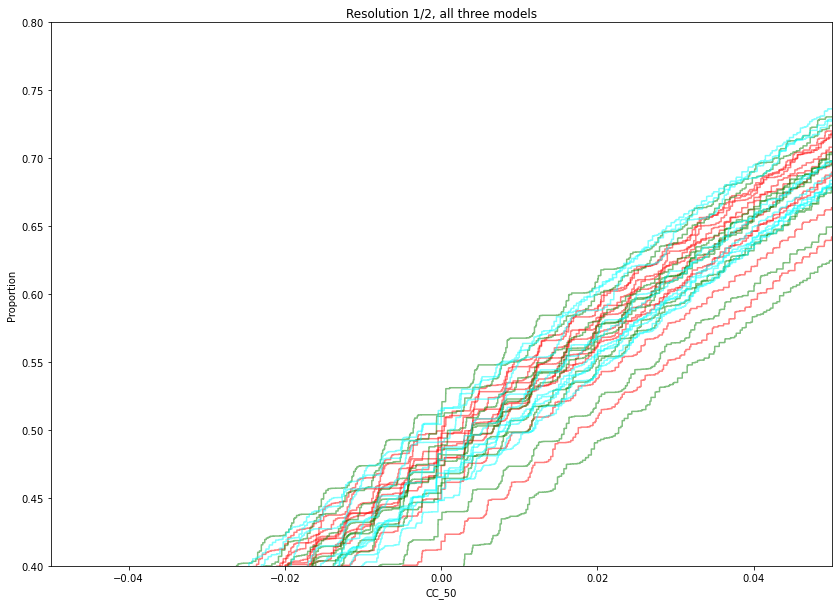

In [56]:
for i in range(1,11):
    cc = df.loc['droop',res[0],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[0],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/2, all three models');
plt.xlim(-0.05,0.05);
plt.ylim(0.4,0.8);

Equal (red) model slightly closer ot true model? Only for a few seed values. Not an overall trend.

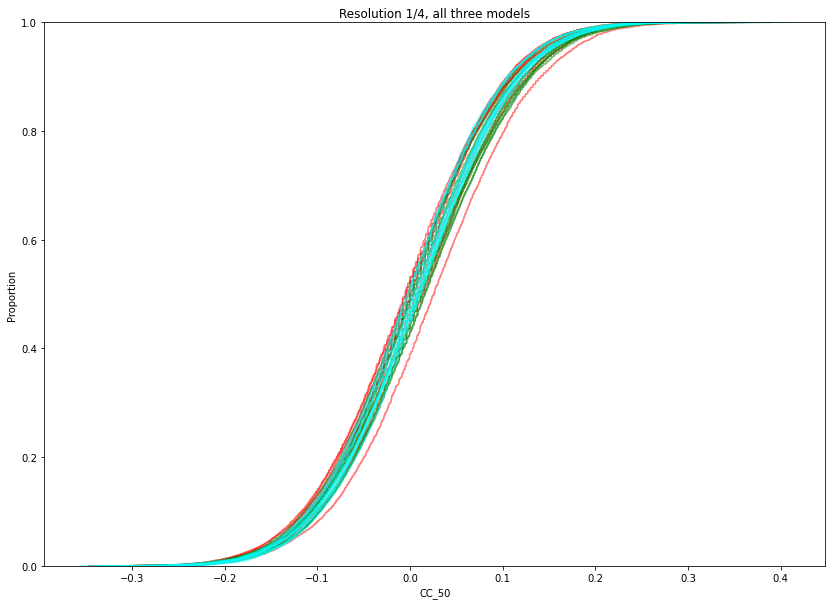

In [58]:
for i in range(1,11):
    cc = df.loc['droop',res[1],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[1],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/4, all three models');

In [115]:
r01 = norm_tests(df.loc['droop',res[1]]['CC_50'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[1]]['CC_50'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


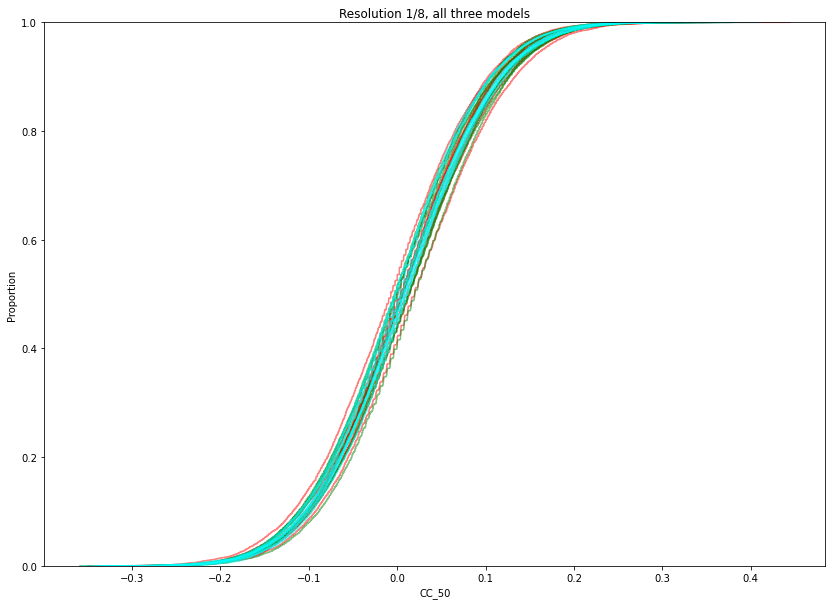

In [59]:
for i in range(1,11):
    cc = df.loc['droop',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/8, all three models');

In [116]:
r01 = norm_tests(df.loc['droop',res[2]]['CC_50'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[2]]['CC_50'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


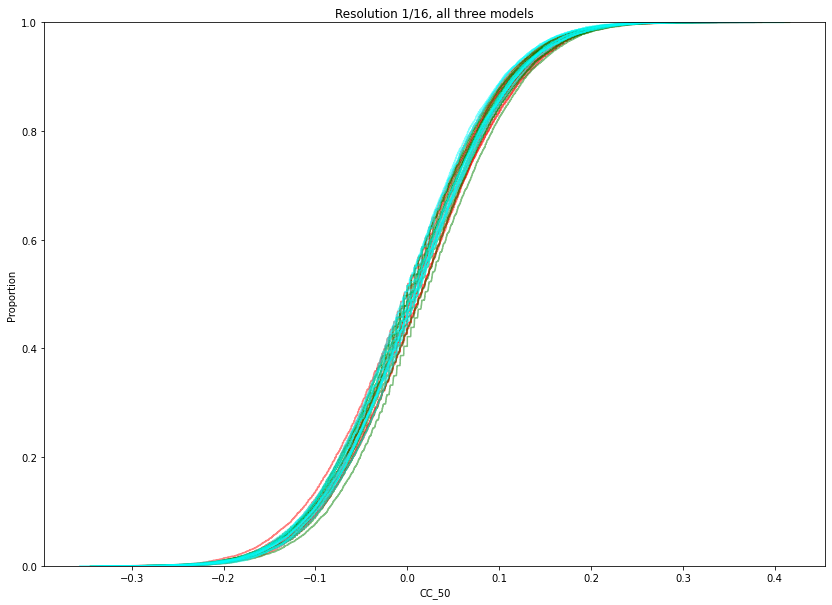

In [60]:
for i in range(1,11):
    cc = df.loc['droop',res[3],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[3],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/16, all three models');

In [117]:
r01 = norm_tests(df.loc['droop',res[3]]['CC_50'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[3]]['CC_50'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


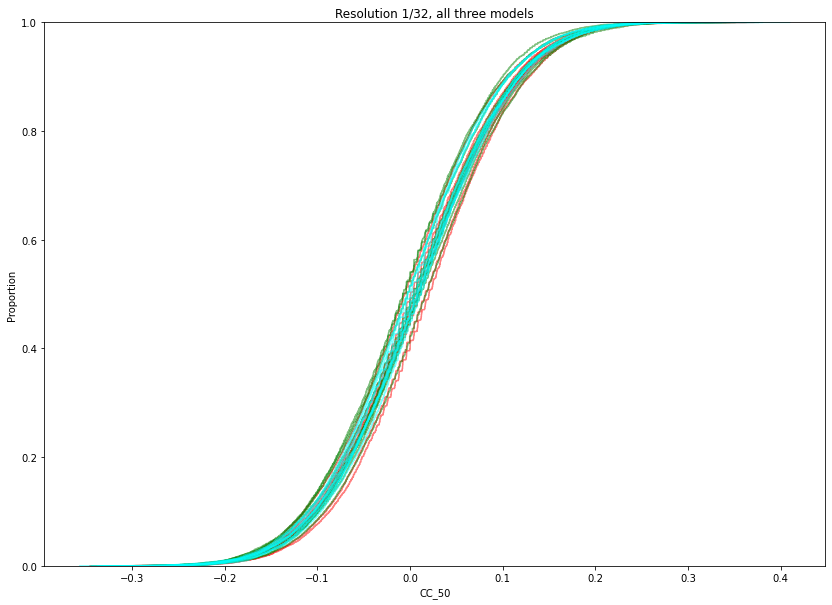

In [61]:
for i in range(1,11):
    cc = df.loc['droop',res[4],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[4],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/32, all three models');

In [118]:
r01 = norm_tests(df.loc['droop',res[4]]['CC_50'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[4]]['CC_50'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


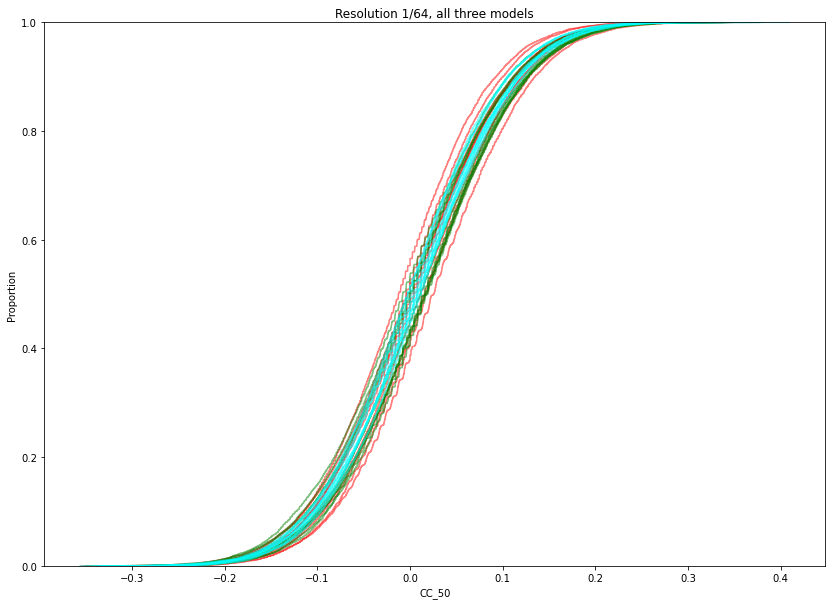

In [62]:
for i in range(1,11):
    cc = df.loc['droop',res[5],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[5],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/64, all three models');

In [119]:
r01 = norm_tests(df.loc['droop',res[5]]['CC_50'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[5]]['CC_50'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


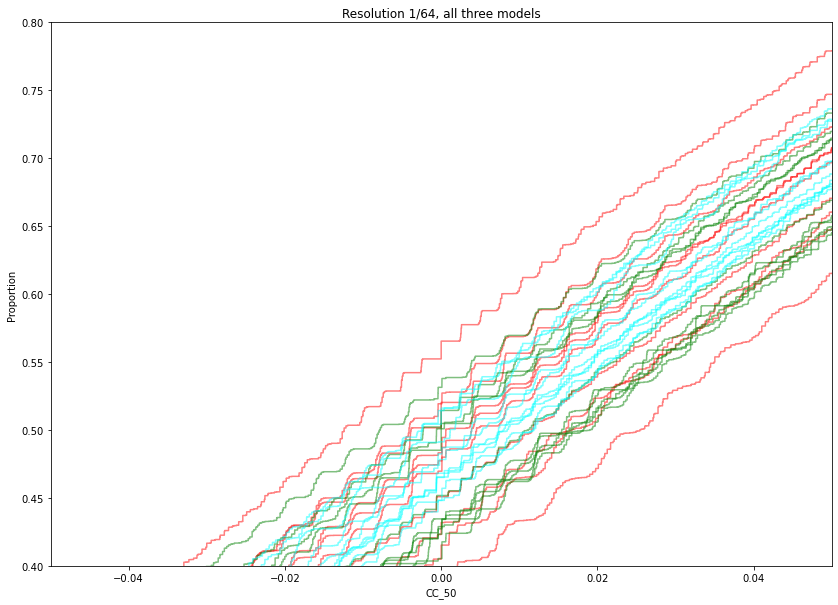

In [63]:
for i in range(1,11):
    cc = df.loc['droop',res[5],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[5],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/64, all three models');
plt.xlim(-0.05,0.05);
plt.ylim(0.4,0.8);

Again, the equal (green) model seems more gathered around equal model.

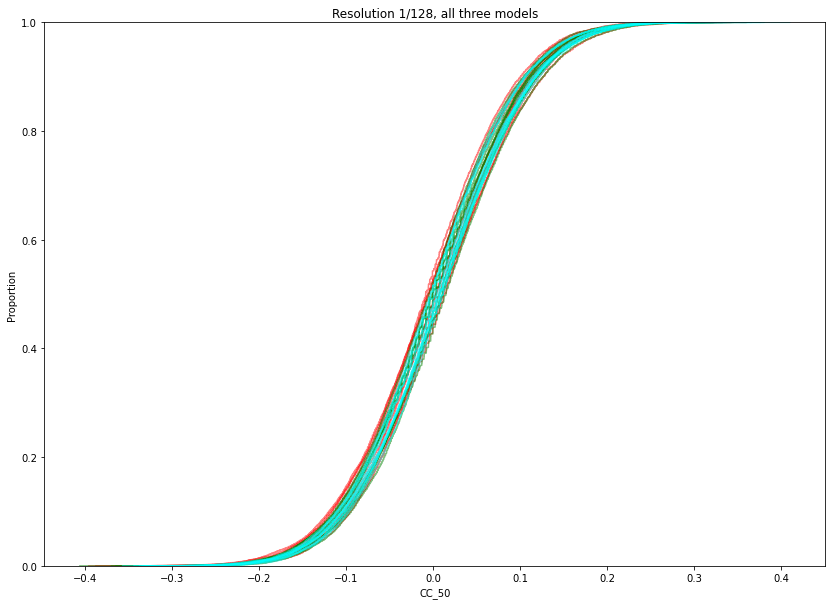

In [64]:
for i in range(1,11):
    cc = df.loc['droop',res[6],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[6],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/128, all three models');

In [120]:
r01 = norm_tests(df.loc['droop',res[6]]['CC_50'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[6]]['CC_50'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


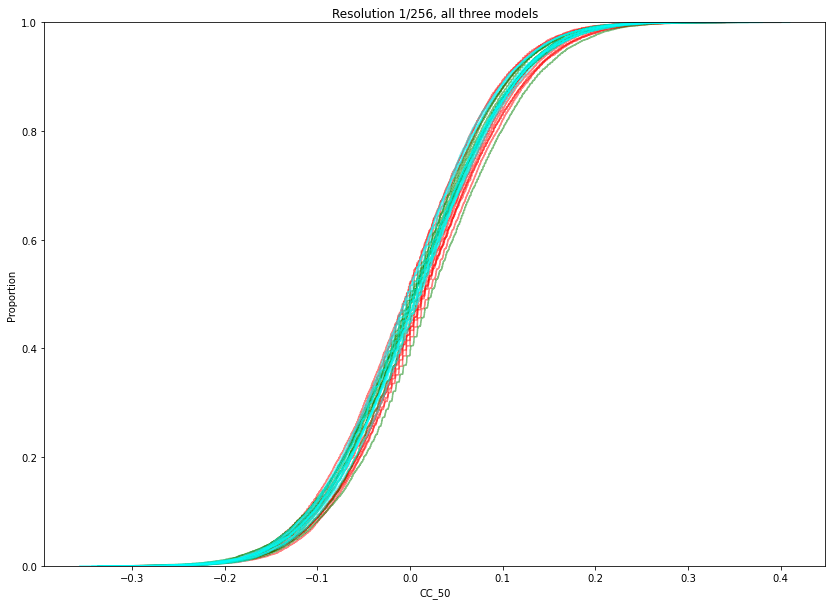

In [65]:
for i in range(1,11):
    cc = df.loc['droop',res[7],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[7],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/256, all three models');

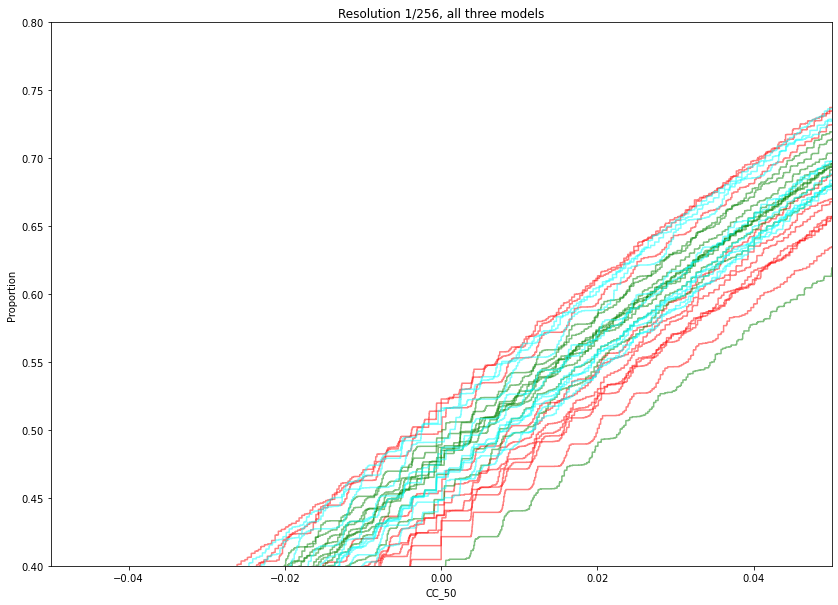

In [66]:
for i in range(1,11):
    cc = df.loc['droop',res[7],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)  
    
    
for i in range(1,11):
    cc = df.loc['equal',res[7],i]['CC_50']
    sns.ecdfplot(cc,color='g',alpha=0.5)
    
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
    
plt.title('Resolution 1/256, all three models');
plt.xlim(-0.05,0.05);
plt.ylim(0.4,0.8);

Not clearly a difference.

We cannot conlude that there is any difference from the models based on the CC distributions. 

In [121]:
r01 = norm_tests(df.loc['droop',res[7]]['CC_50'])
print(f'{r01} tests failed')
r02 = norm_tests(df.loc['equal',res[7]]['CC_50'])
print(f'{r02} tests failed')

0 tests failed
0 tests failed


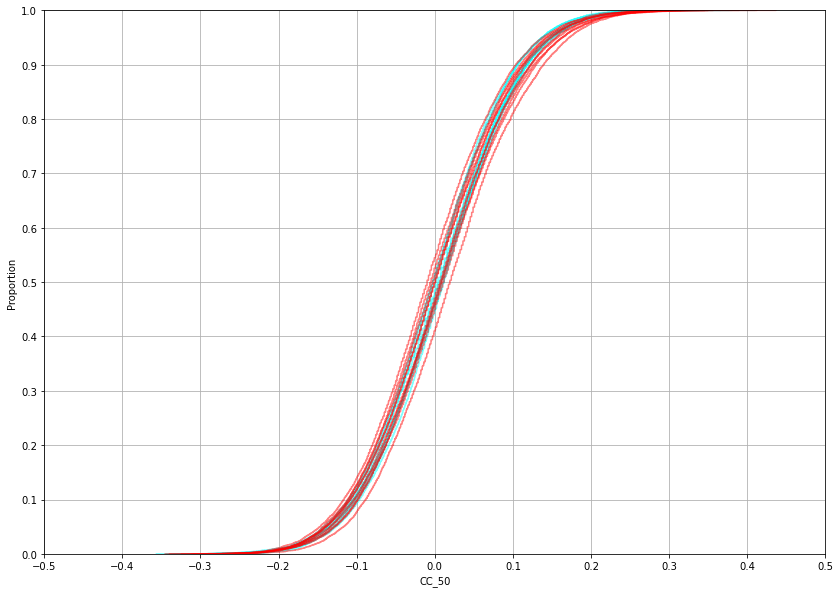

In [11]:
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='aqua',alpha=0.5)
# plot the true values
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc*3-0.025,color='r',alpha=0.5)
plt.yticks(np.linspace(0,1,num=11))
plt.xticks(np.linspace(-0.5,0.5,num=11))
plt.xlim(-0.5,0.5)
plt.grid()        

plot cc_5 alene, plot cc 50 alene, continuous.

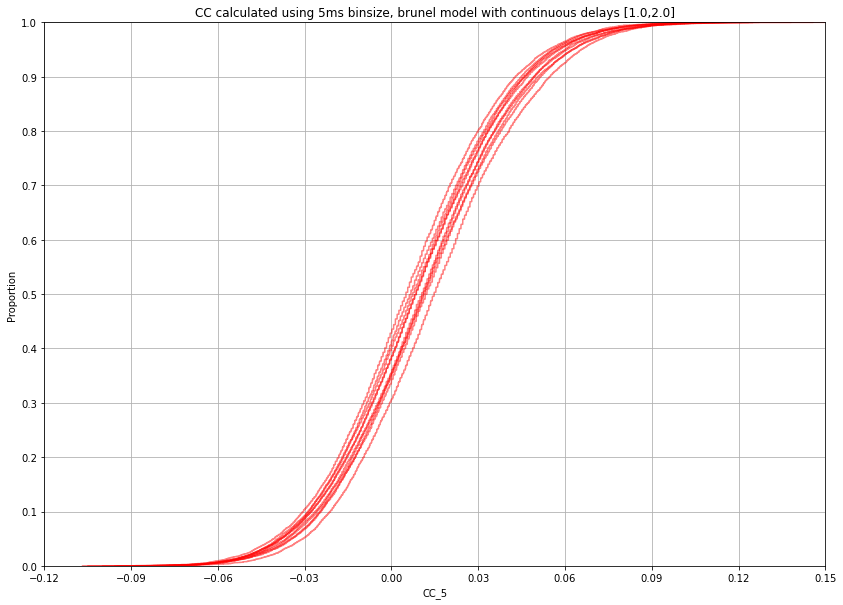

In [36]:
plt.figure();
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_5']
    sns.ecdfplot(cc,color='r',alpha=0.5)
plt.title('CC calculated using 5ms binsize, brunel model with continuous delays [1.0,2.0]');
plt.grid();
plt.yticks(np.linspace(0,1,num=11));
plt.xticks(np.linspace(-0.15,0.15,num=11));
plt.xlim(-0.12,0.15);

#plt.savefig('CC_5.pdf',format='pdf')

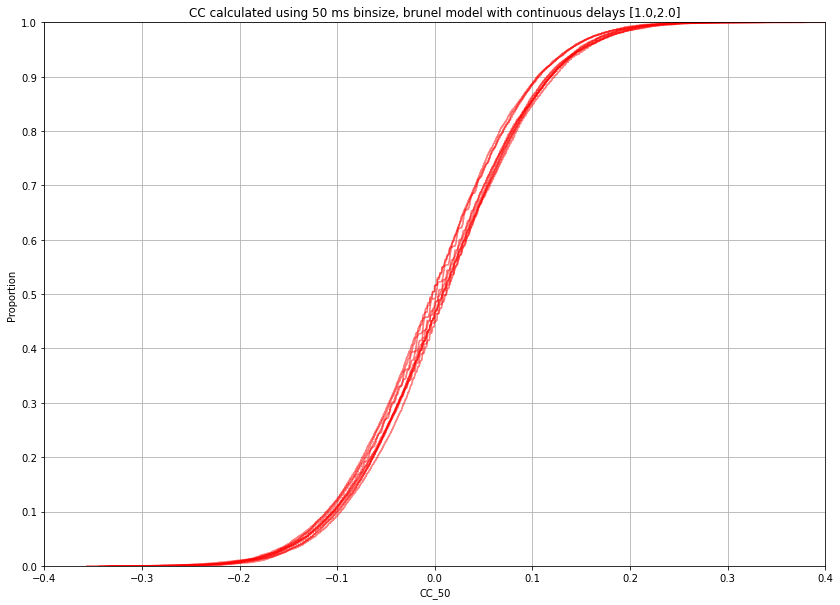

In [37]:
plt.figure();
for i in range(1,11):
    cc = df.loc['continuous',res[2],i]['CC_50']
    sns.ecdfplot(cc,color='r',alpha=0.5)
plt.title('CC calculated using 50 ms binsize, brunel model with continuous delays [1.0,2.0]');
plt.grid();
plt.yticks(np.linspace(0,1,num=11));
plt.xticks(np.linspace(-0.4,0.4,num=9));
plt.xlim(-0.4,0.4);

#plt.savefig('CC_50.pdf',format='pdf');

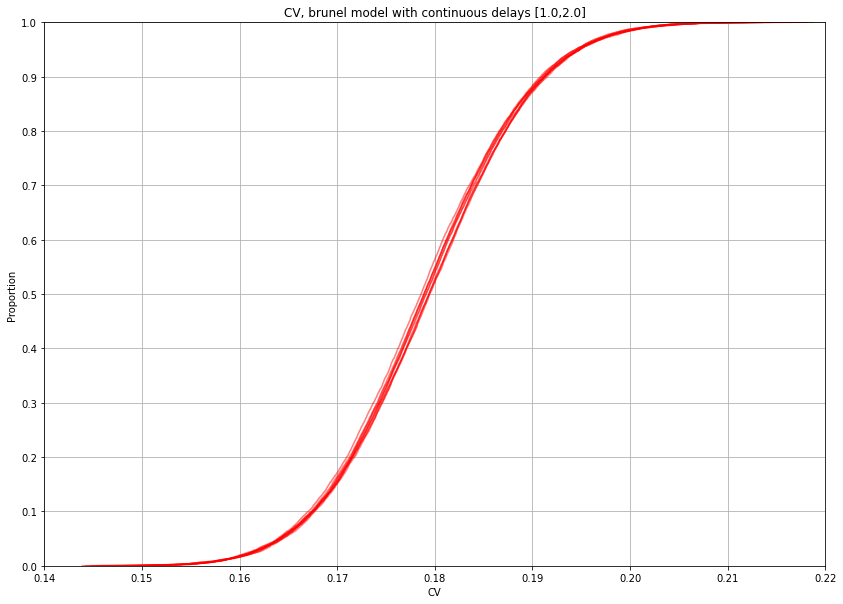

In [38]:
plt.figure();
for i in range(1,11):
    cv = df.loc['continuous',res[2],i]['CV']
    sns.ecdfplot(cv,color='r',alpha=0.5)
plt.title('CV, brunel model with continuous delays [1.0,2.0]');
plt.grid();
plt.yticks(np.linspace(0,1,num=11));
plt.xlim(0.14,0.22);

#plt.savefig('CV.pdf',format='pdf');

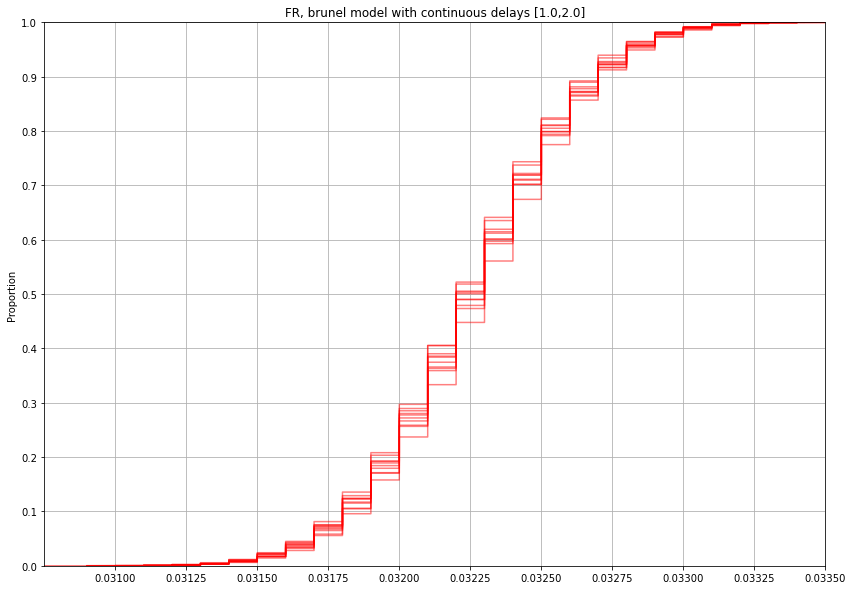

In [39]:
plt.figure();
for i in range(1,11):
    fr = [float(x) for x in df.loc['continuous',res[2],i]['FR']]
    sns.ecdfplot(fr,color='r',alpha=0.5)
plt.title('FR, brunel model with continuous delays [1.0,2.0]');
plt.grid();
plt.yticks(np.linspace(0,1,num=11));
plt.xticks(np.linspace(0.0310,0.0335,num=11));
plt.xlim(0.03075,0.0335);

plt.savefig('FR.pdf',format='pdf');